In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!nvidia-smi

Tue Dec 31 02:40:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics -q

from IPython import display
display.clear_output()
!yolo mode=checks

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 912, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'predict', 'val', 'track', 'export', 'train', 'benchmark'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is o

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!rm -r /content/kaggle-ships-in-google-earth-3
# !rm -r /content/datasets/runs

rm: cannot remove '/content/kaggle-ships-in-google-earth-3': No such file or directory


Note there is a recent change in YOLOv8 requiring datasets in a `datasets` - not sure if this will change

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
from getpass import getpass

api_key = getpass('Enter ROBOFLOW_API_KEY secret value: ')

rf = Roboflow(api_key=api_key)
project = rf.workspace("robin-public").project("kaggle-ships-in-google-earth-dfqwt")
dataset = project.version(3).download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.3 MB/s eta 0:00:00
Enter ROBOFLOW_API_KEY secret value: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to kaggle-ships-in-google-earth-3 in yolov8:: 100%|██████████| 3328/3328 [00:00<00:00, 6192.30it/s]


In [ ]:
print(dataset.location)
os.path.exists(f'{dataset.location}/data.yaml')

/content/datasets/kaggle-ships-in-google-earth-3


True

## Custom Training

In [ ]:
# Python API is work in progress
# model = YOLO('yolov8m.pt')  # load a pretrained model (recommended for training)

# # Use the model
# results = model.train(
#     data=f'{dataset.location}/data.yaml',
#     epochs=100,
#     imgsz=640,
#     batch=16
# )  # train the model

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 batch=16

/content
100% 6.25M/6.25M [00:00<00:00, 151MB/s]
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/kaggle-ships-in-google-earth-3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fal

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1735613051.706f3a9ddd66.1846.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch8010.jpg  weights
P_curve.png					    train_batch8011.jpg
PR_curve.png					    train_batch8012.jpg


/content


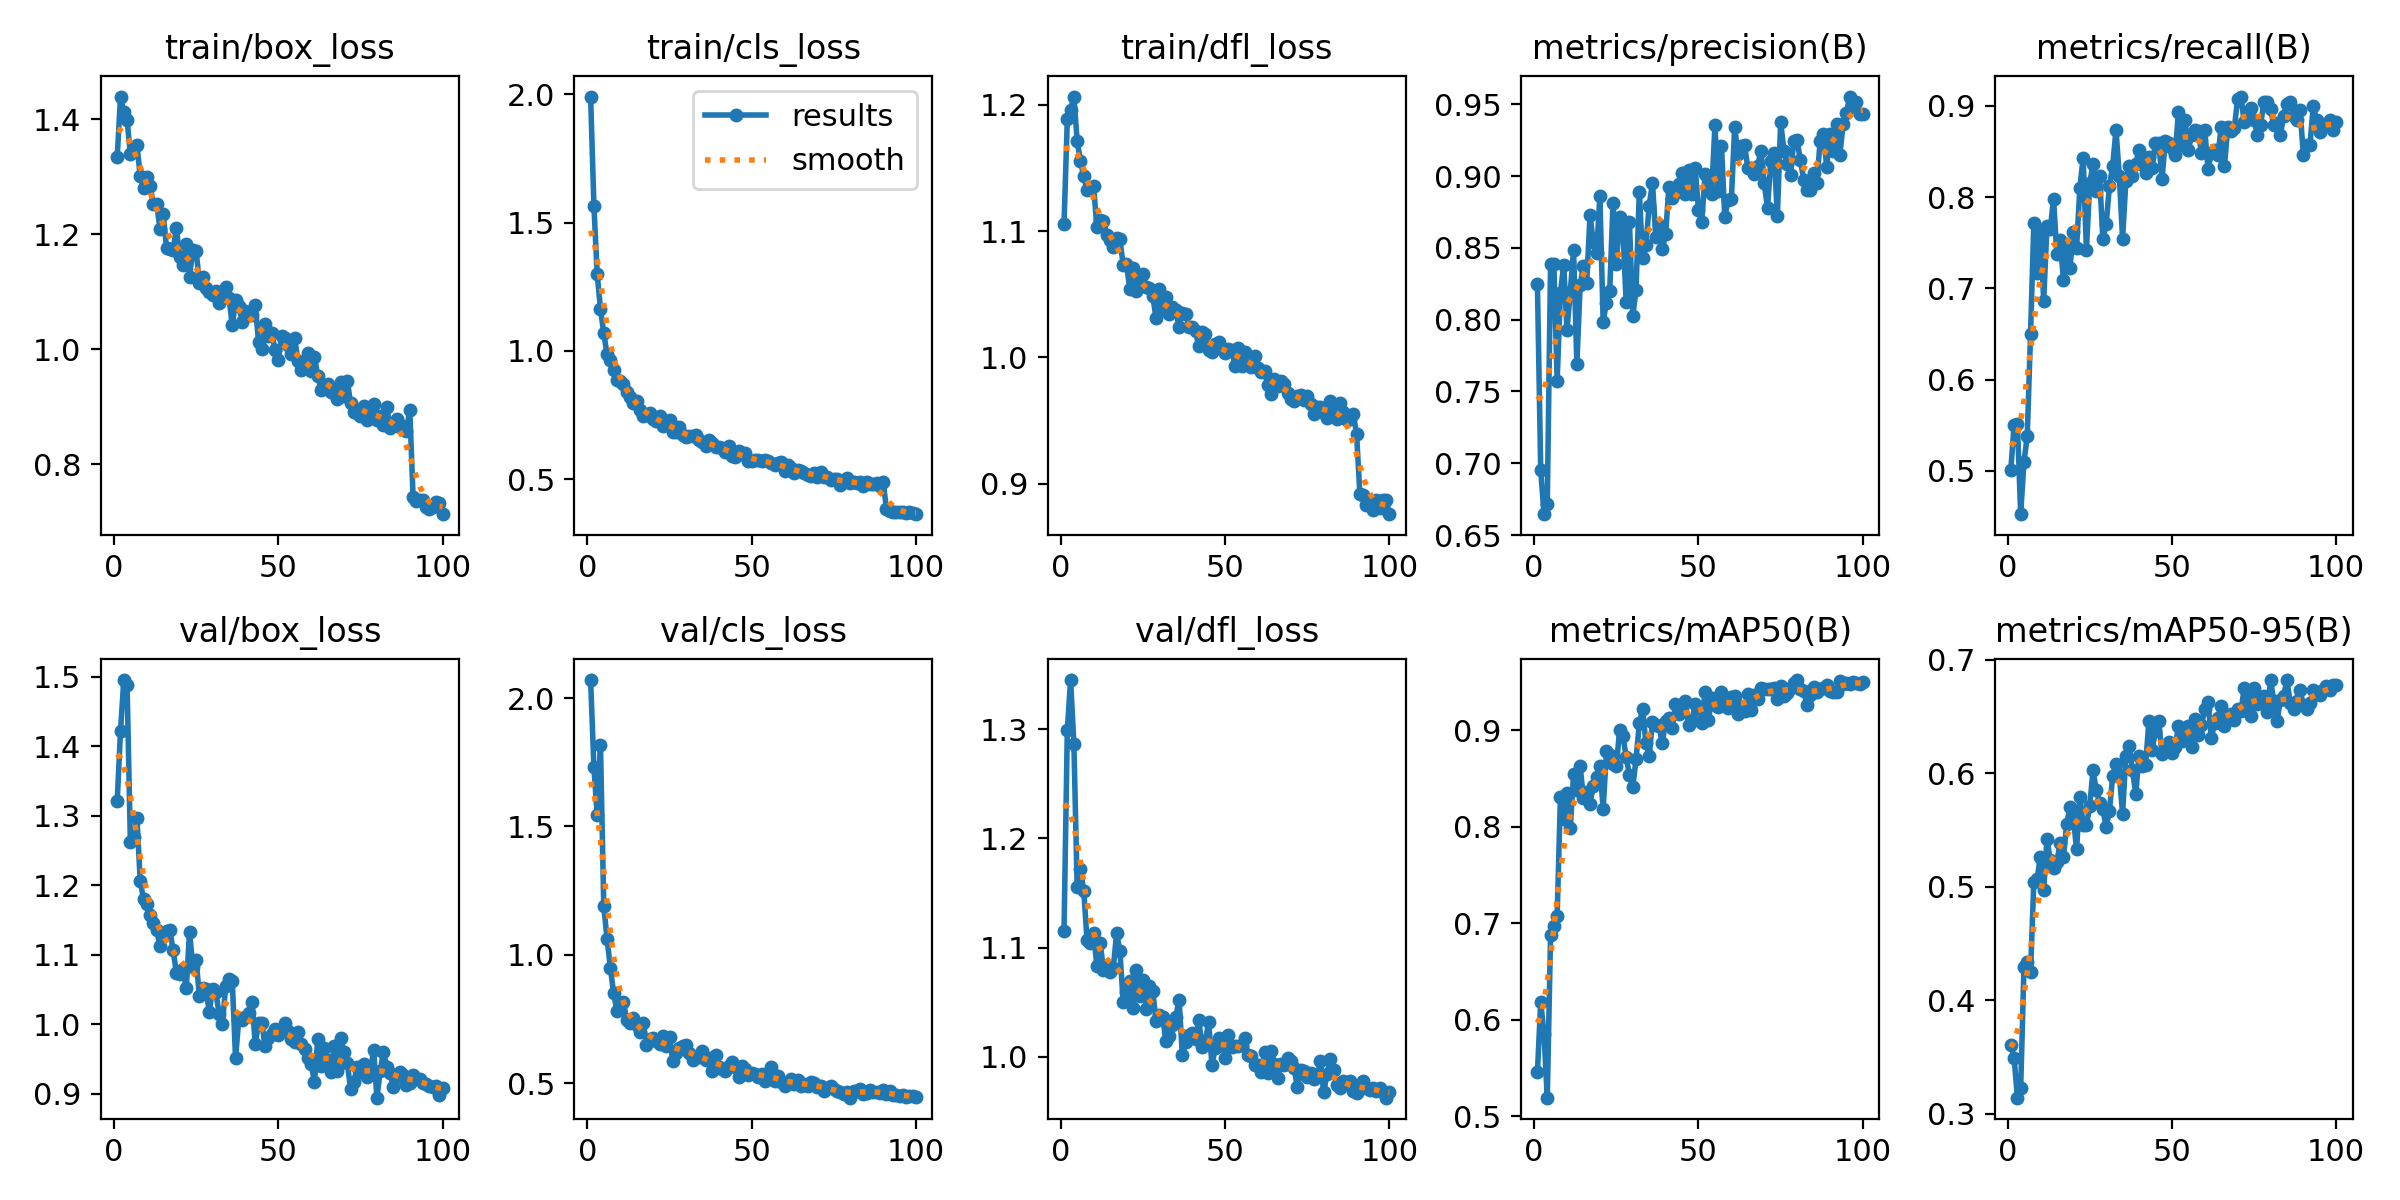

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000) # apparently not created using the python api

/content


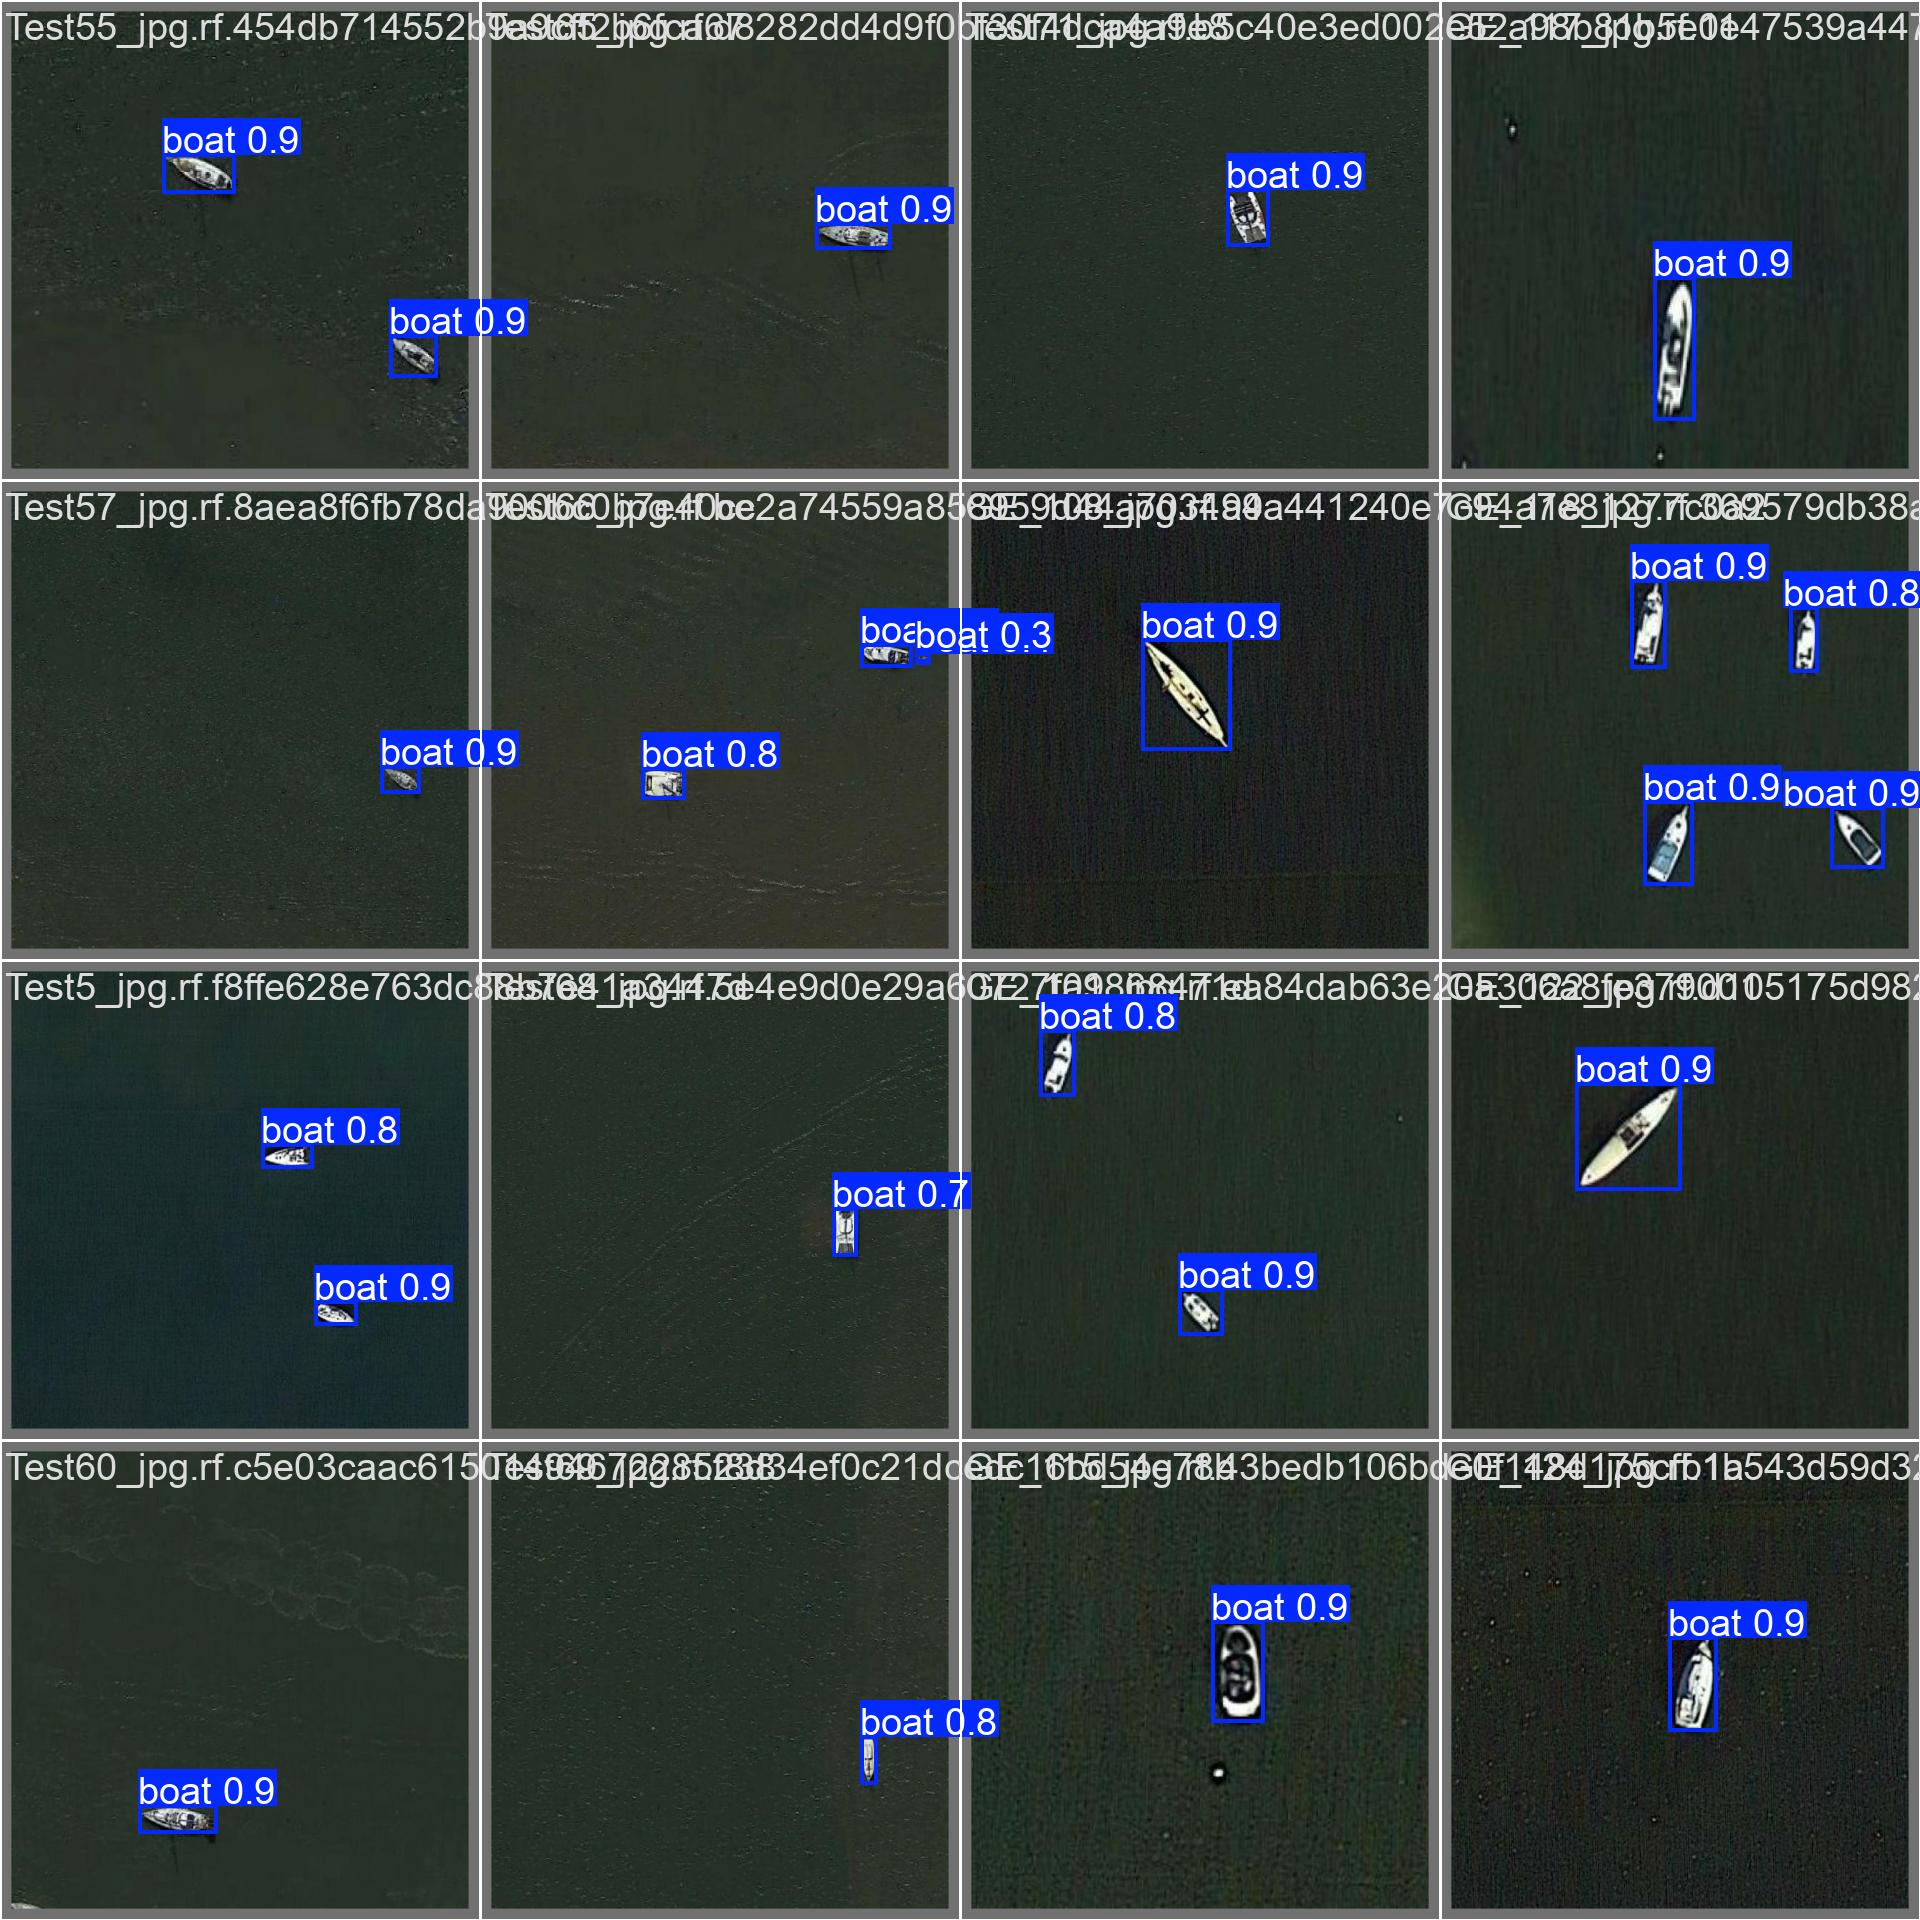

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
#results = model.val()

NameError: name 'model' is not defined

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/kaggle-ships-in-google-earth-3/valid/labels.cache... 159 images, 0 backgrounds, 0 corrupt: 100% 159/159 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:05<00:00,  1.88it/s]
                   all        159        357      0.927      0.895      0.947       0.68
Speed: 3.8ms preprocess, 6.7ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
# model.predict(conf=0.7, source=f"{dataset.location}/test/images", save=True)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.7 source={dataset.location}/test/images

/content
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/79 /content/datasets/kaggle-ships-in-google-earth-3/test/images/GE_120_jpg.rf.e7c3cded9f39881166c69c36f0aa97ae.jpg: 640x640 1 boat, 9.2ms
image 2/79 /content/datasets/kaggle-ships-in-google-earth-3/test/images/GE_138_jpg.rf.53840c0f1bb23656c231d1e566eb31bb.jpg: 640x640 3 boats, 7.4ms
image 3/79 /content/datasets/kaggle-ships-in-google-earth-3/test/images/GE_149_jpg.rf.64eaebc9c2cebd503817230290d16d29.jpg: 640x640 1 boat, 7.4ms
image 4/79 /content/datasets/kaggle-ships-in-google-earth-3/test/images/GE_163_jpg.rf.80246d857e976d499157eb5038d760e2.jpg: 640x640 1 boat, 7.4ms
image 5/79 /content/datasets/kaggle-ships-in-google-earth-3/test/images/GE_167_jpg.rf.d2f3415ed10c3a60c05816aaaf212f6f.jpg: 640x640 1 boat, 7.3ms
image 6/79 /content/datasets/kaggle-ships-in-google-earth-3/test/images/GE_188_jpg.rf.e5b9c57e5d

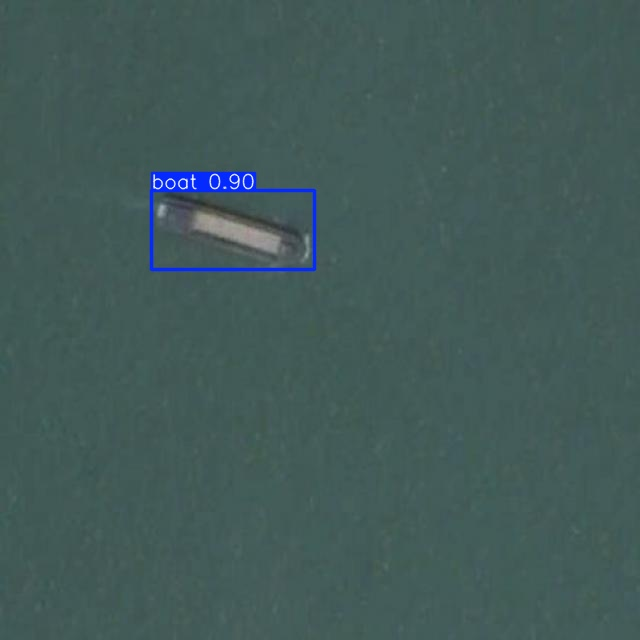

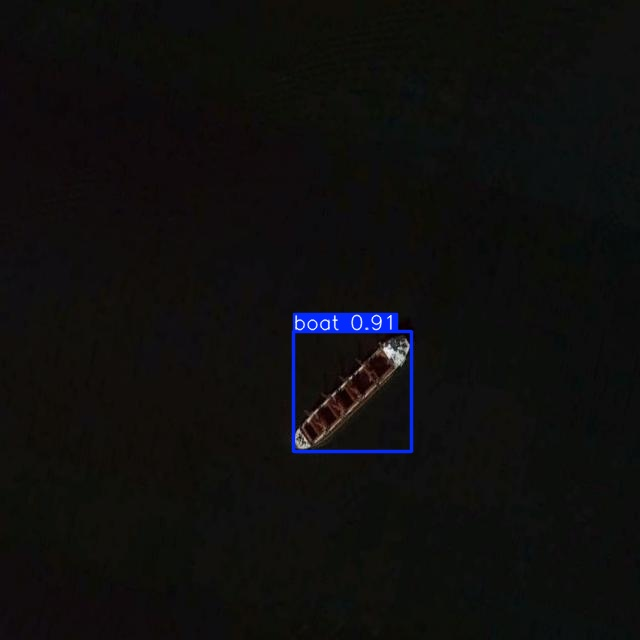

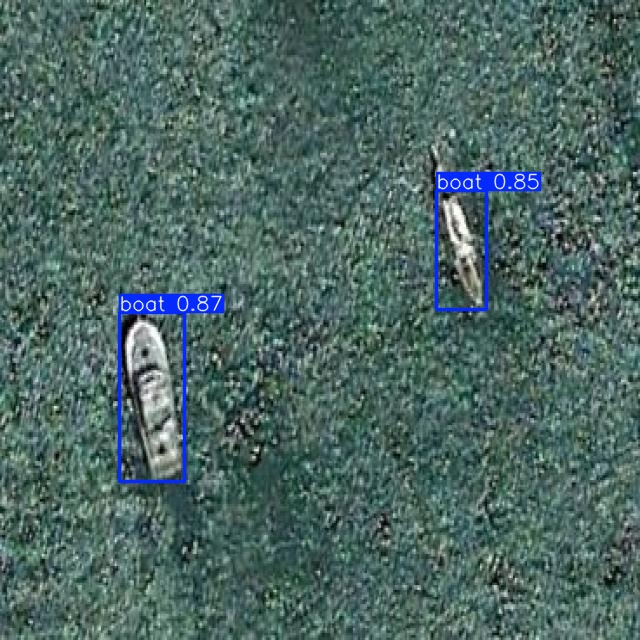

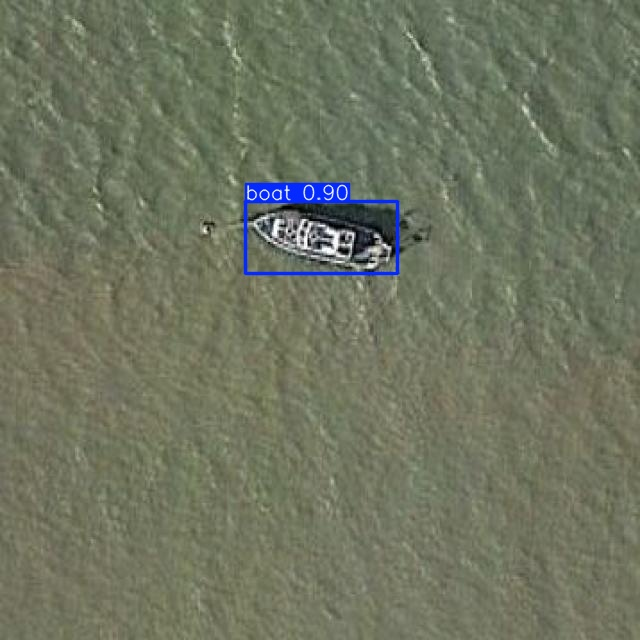

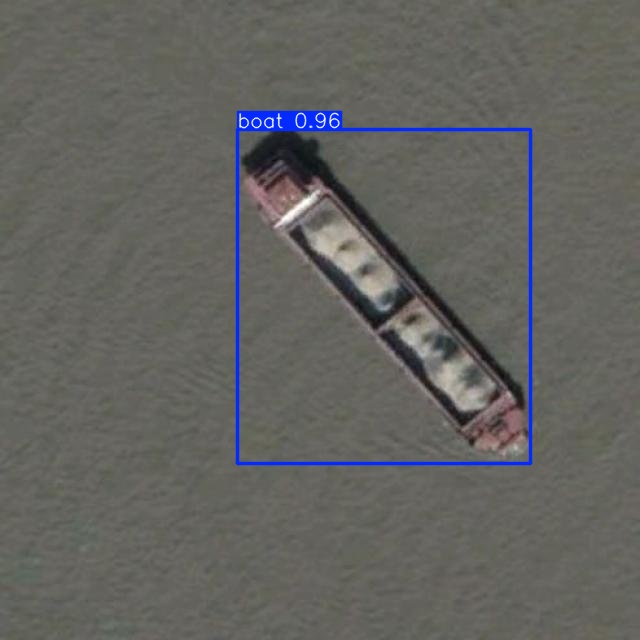

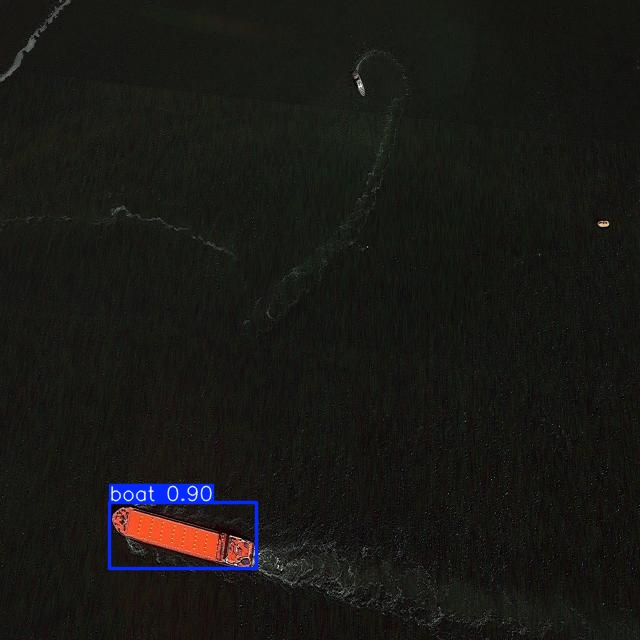

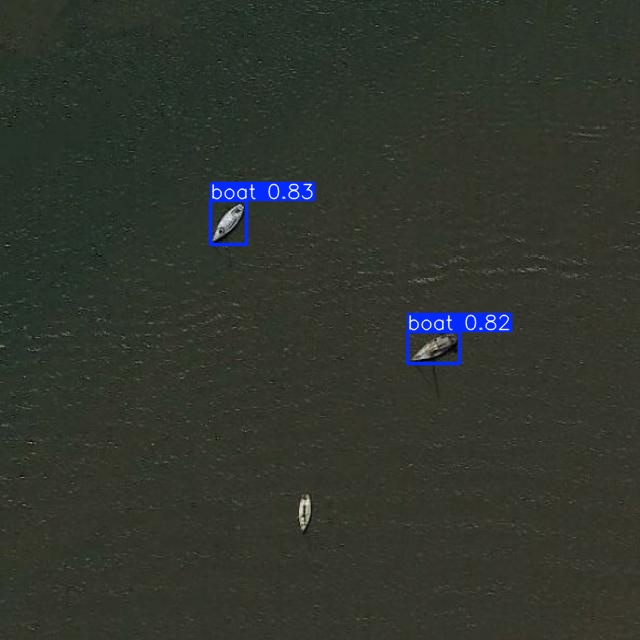

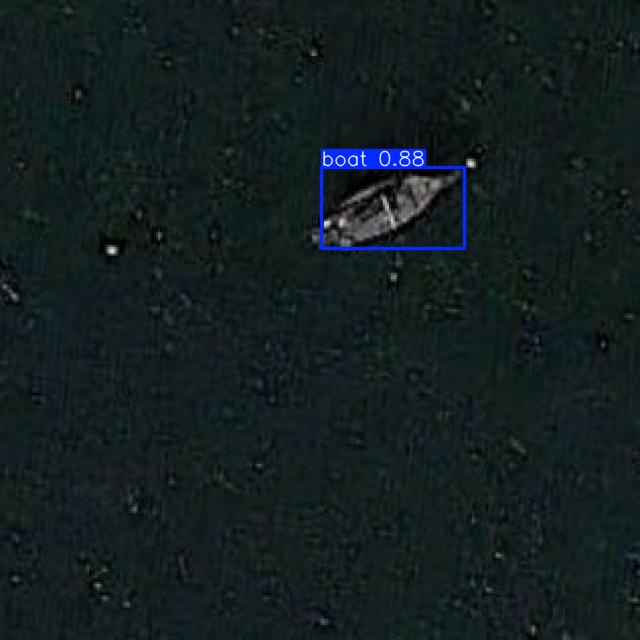

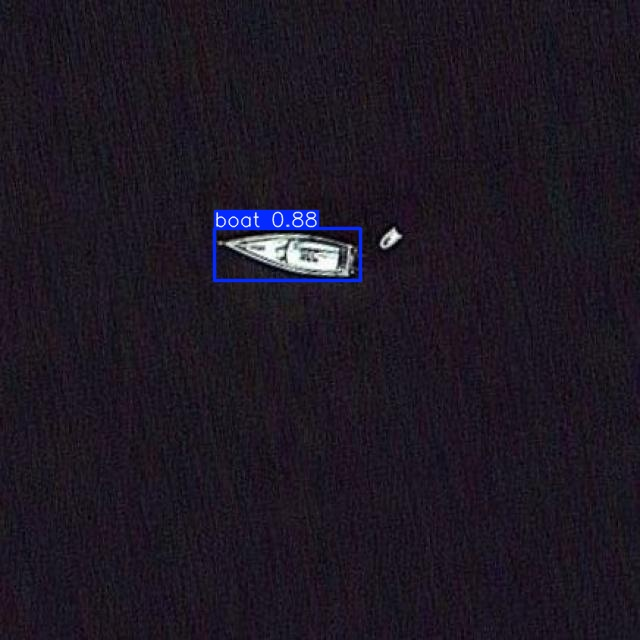

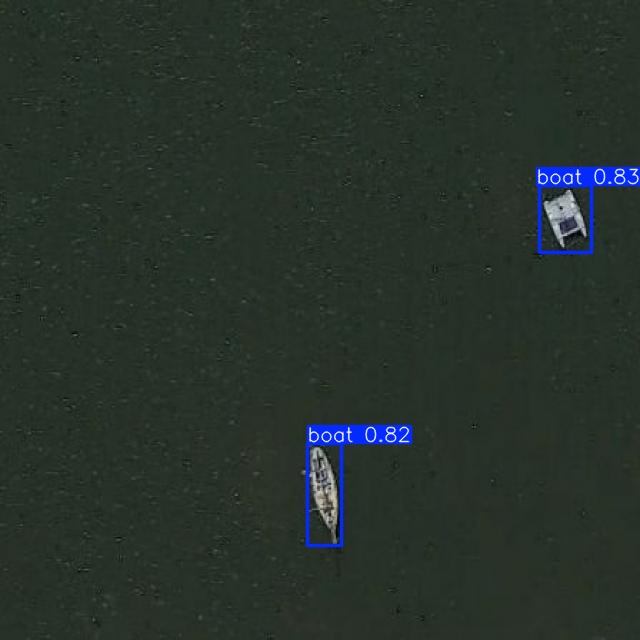

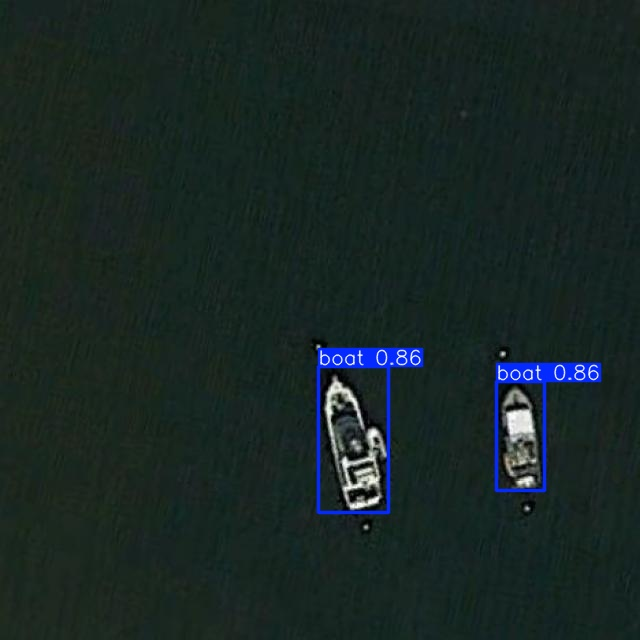

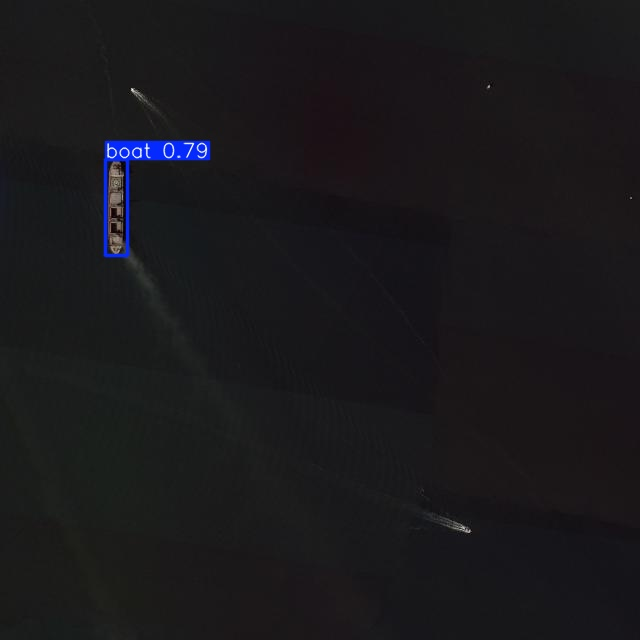

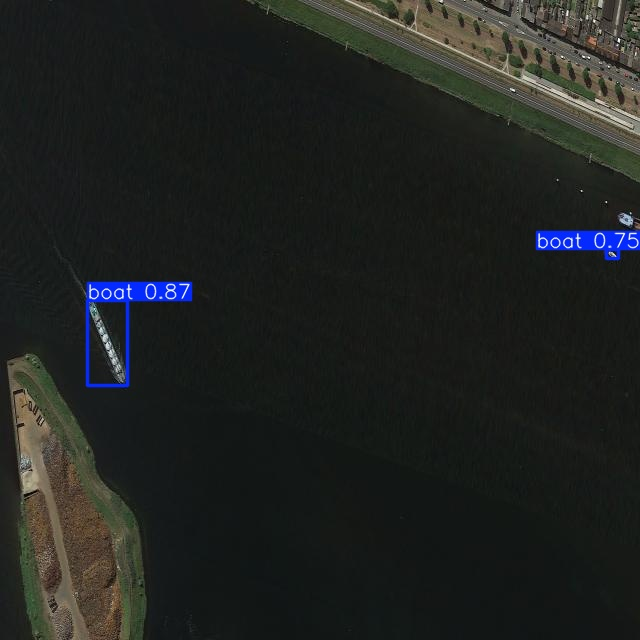

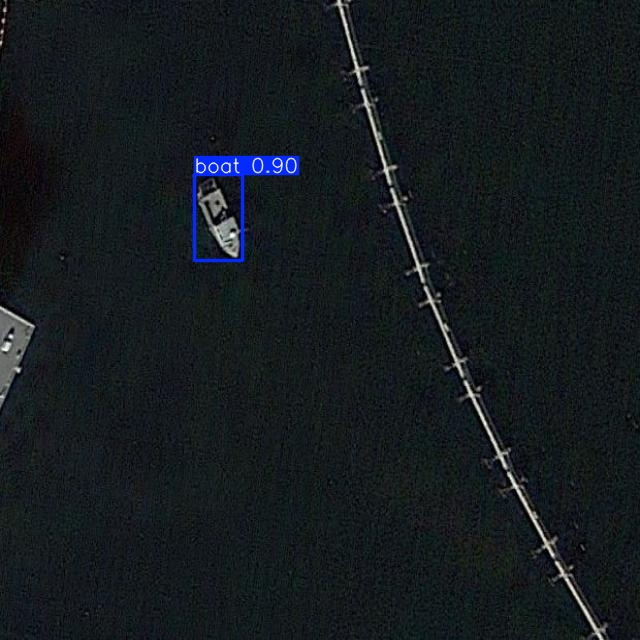

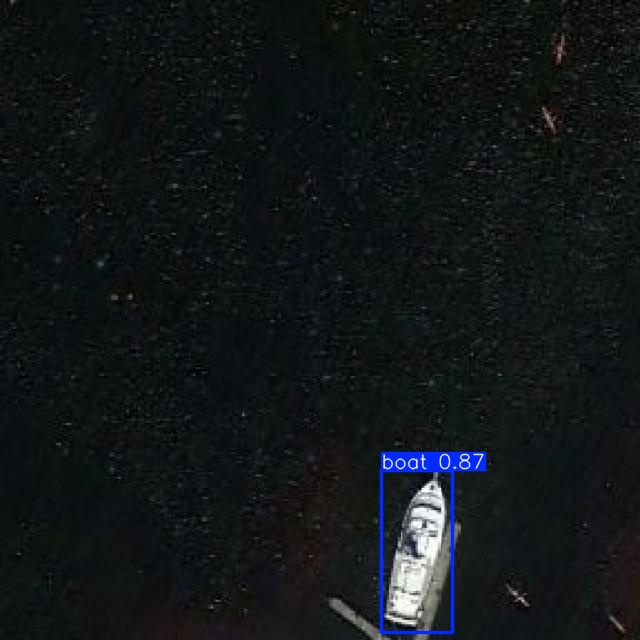

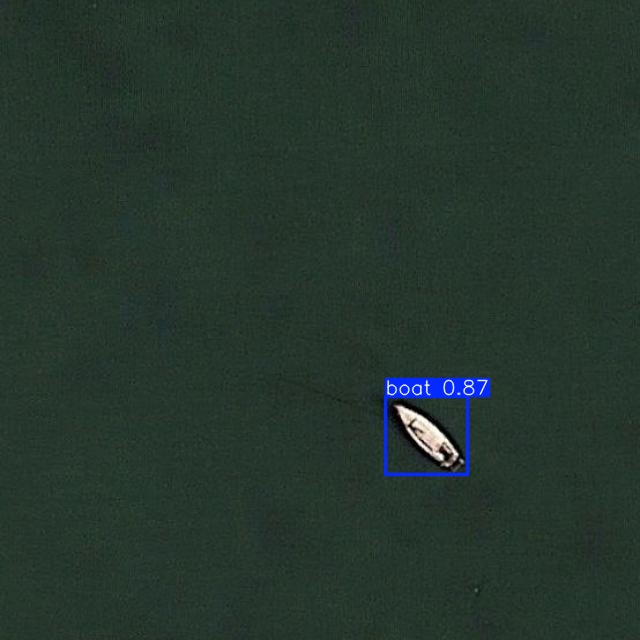

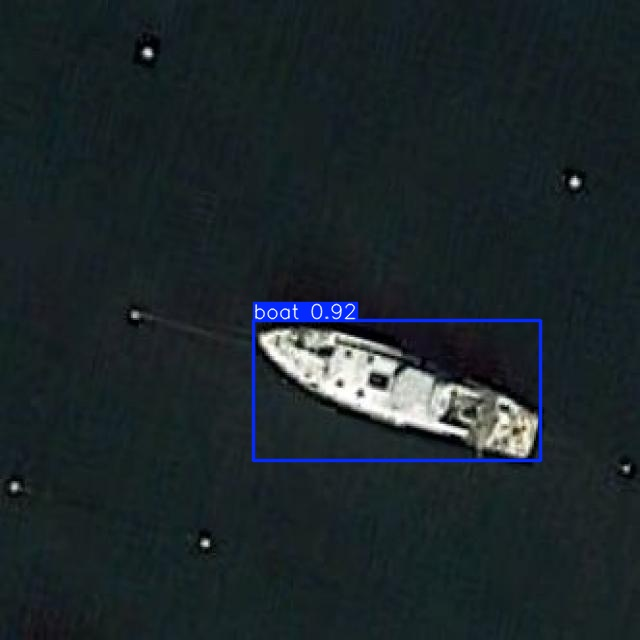

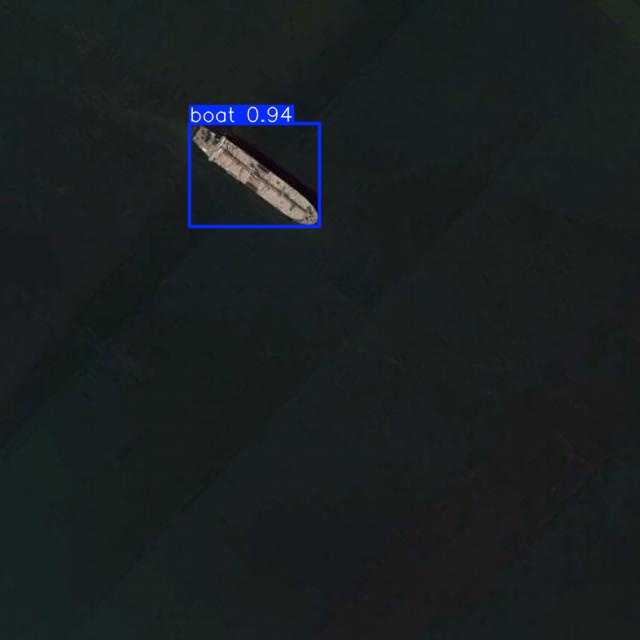

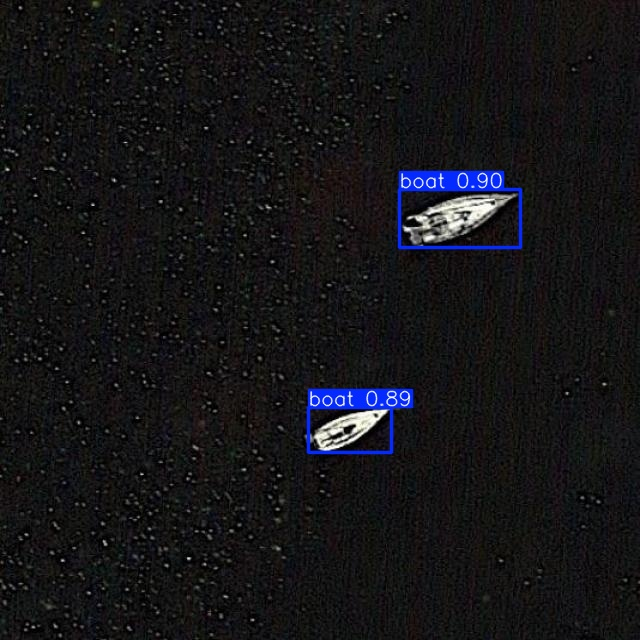

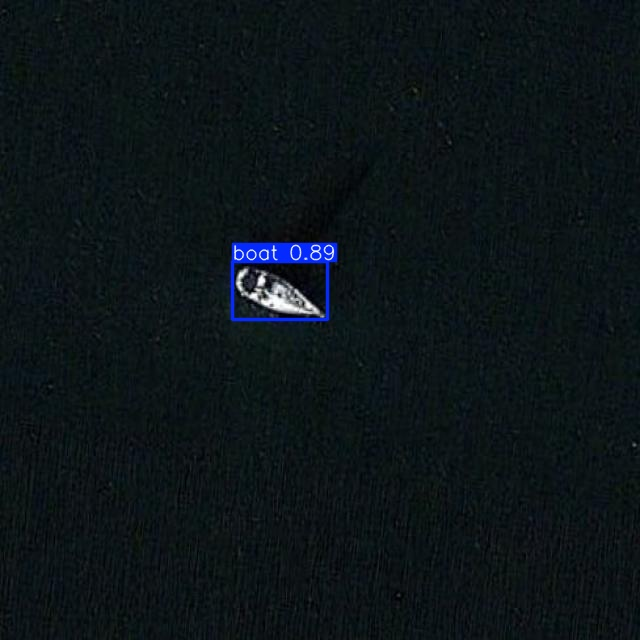

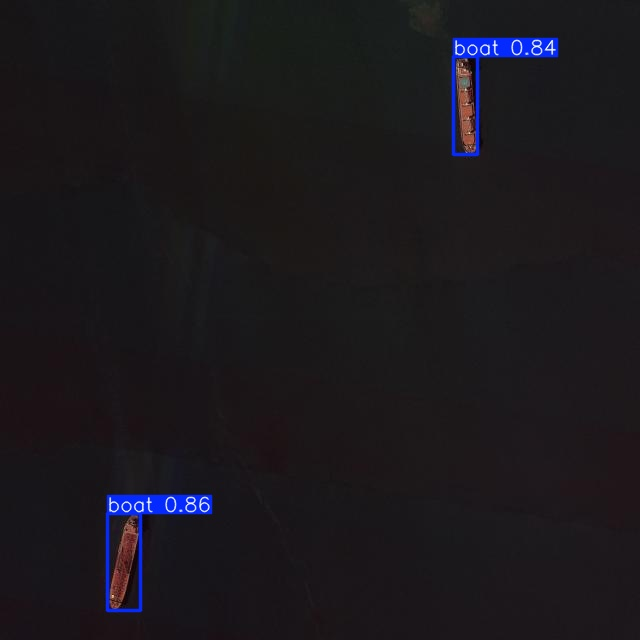

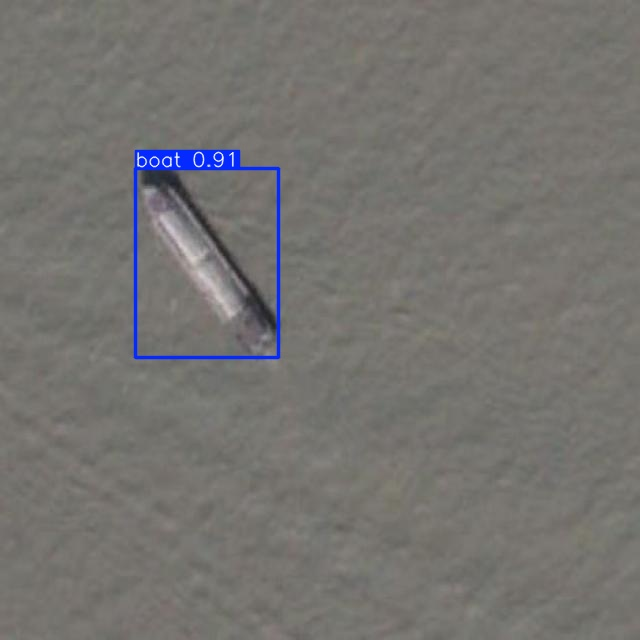

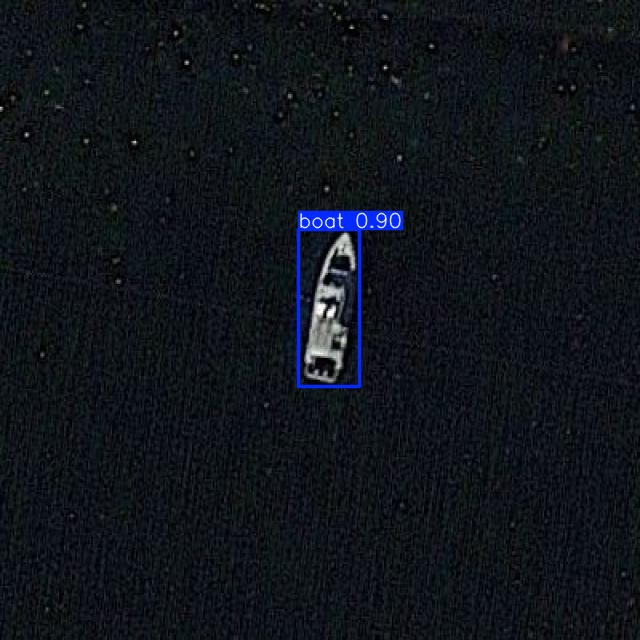

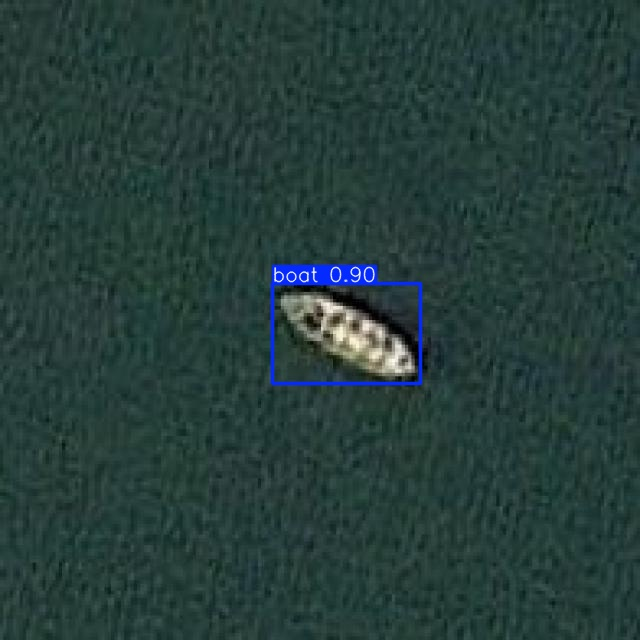

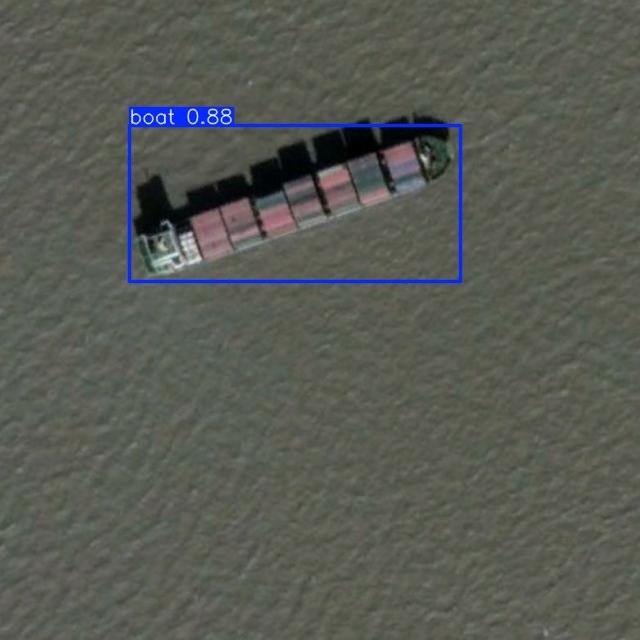

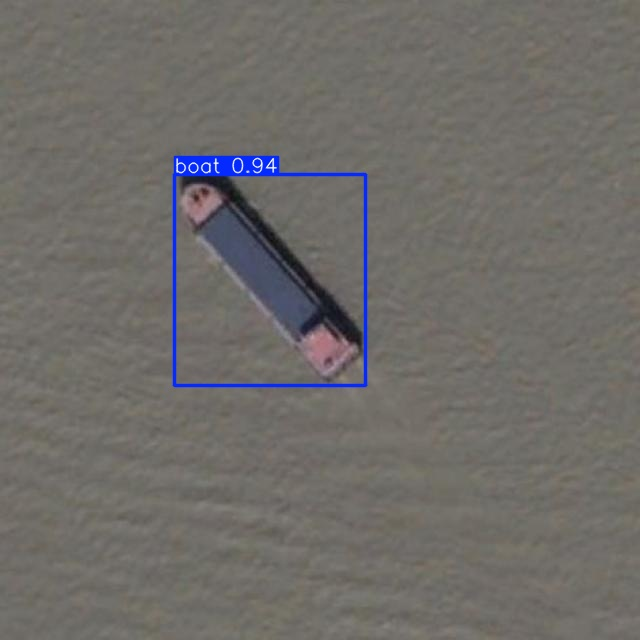

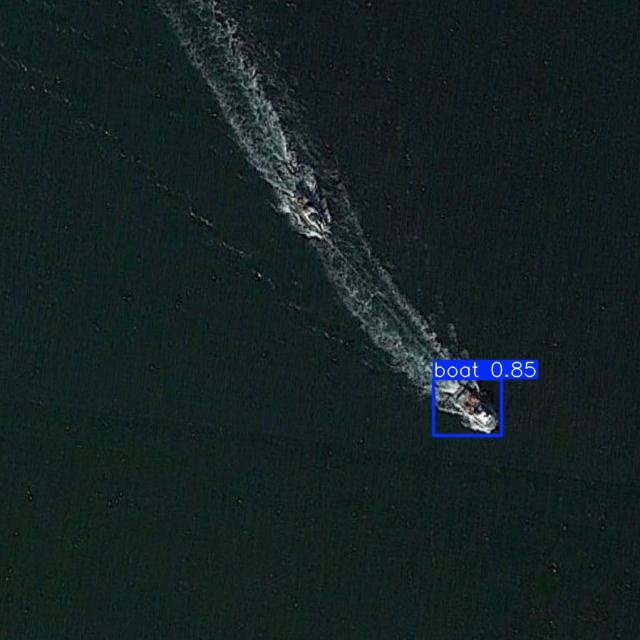

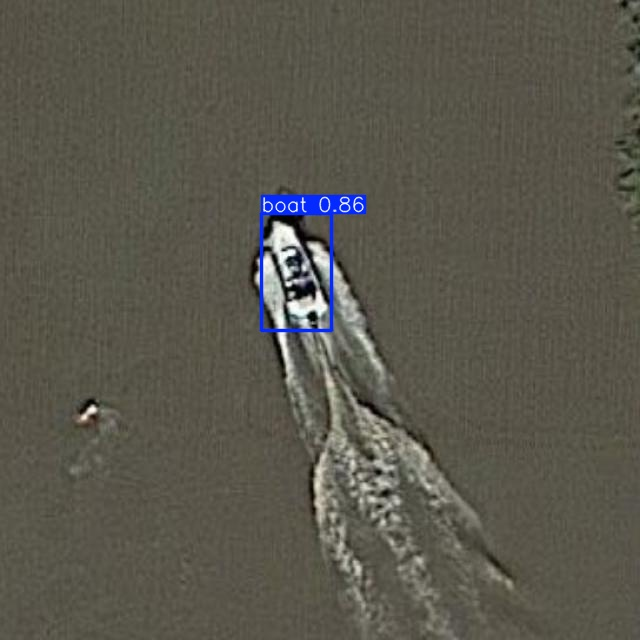

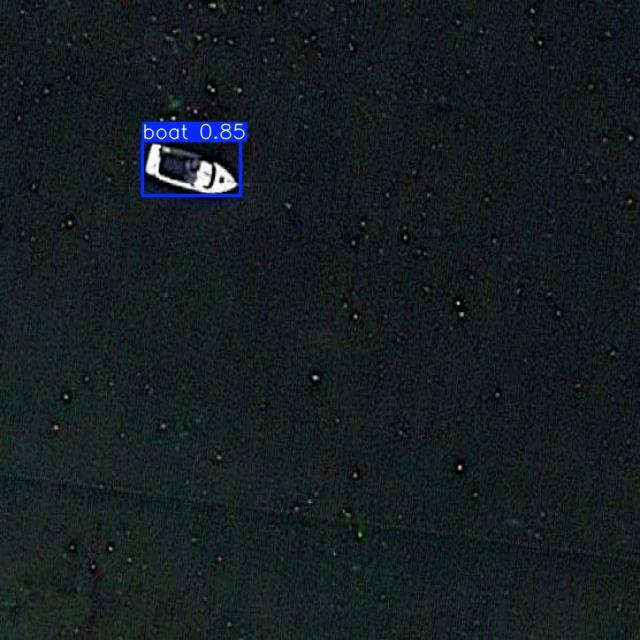

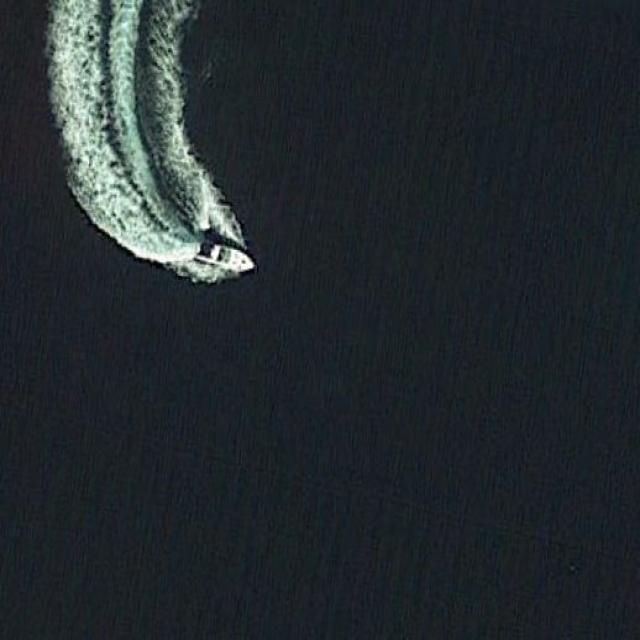

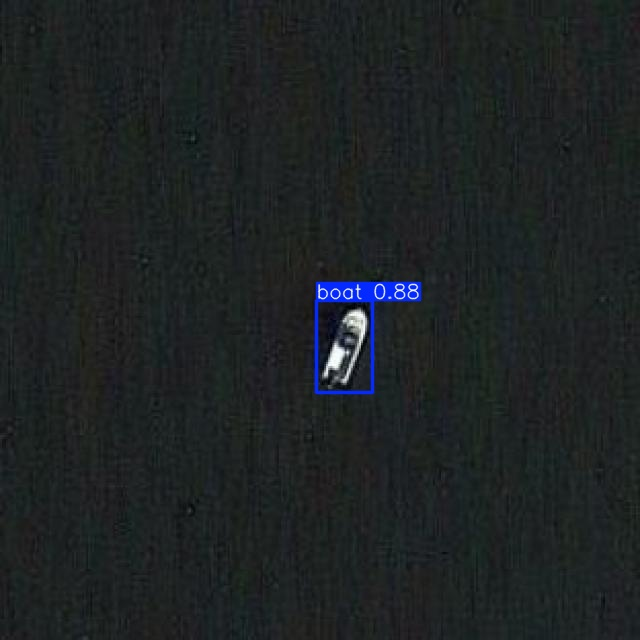

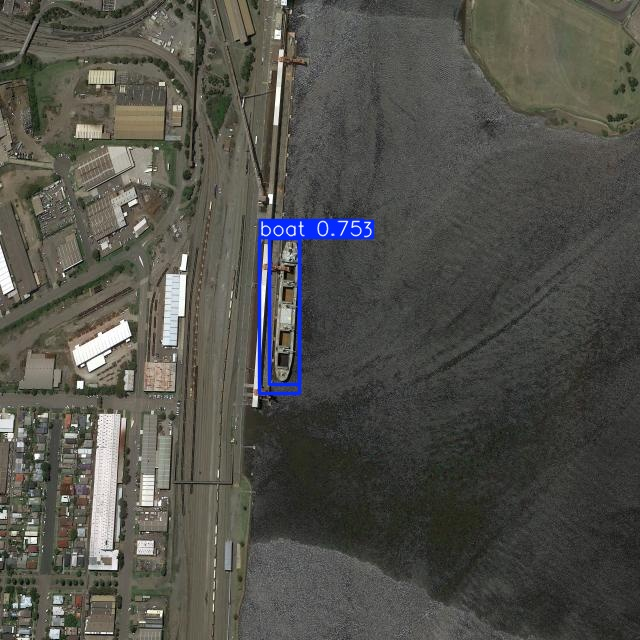

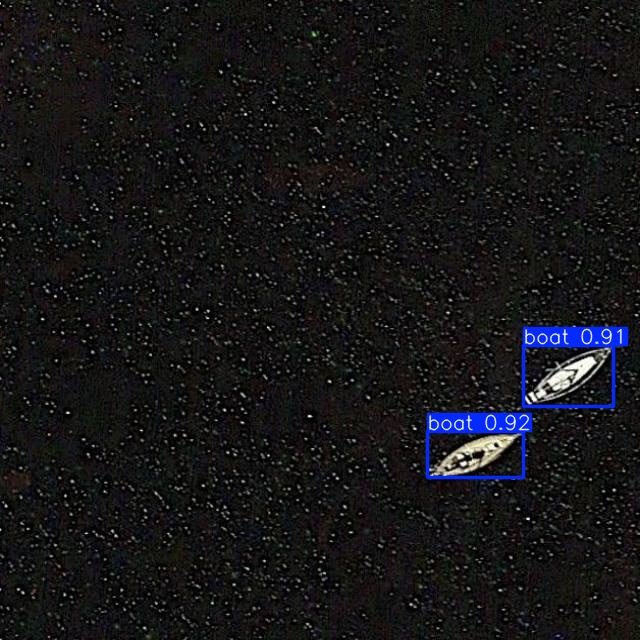

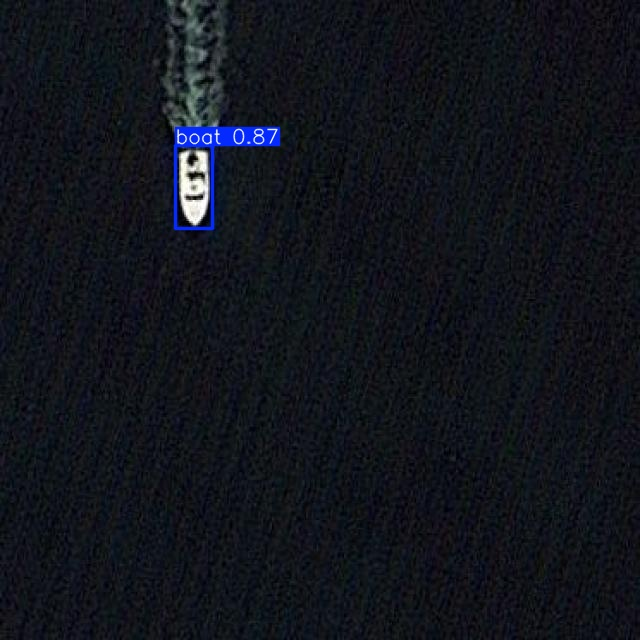

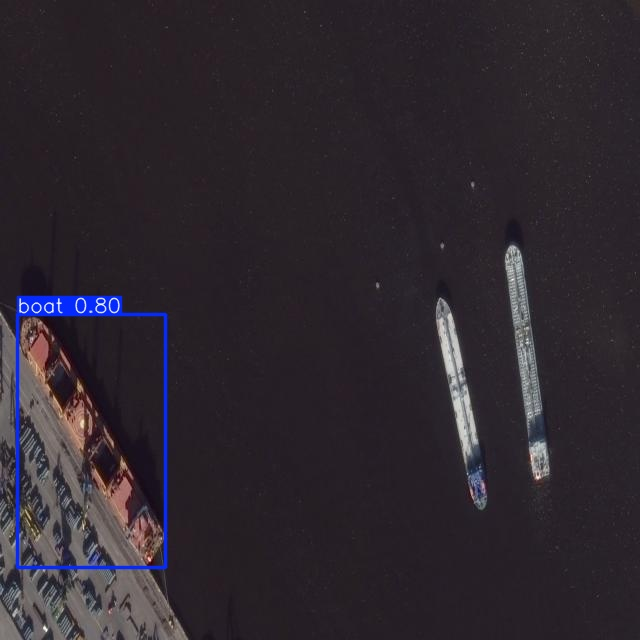

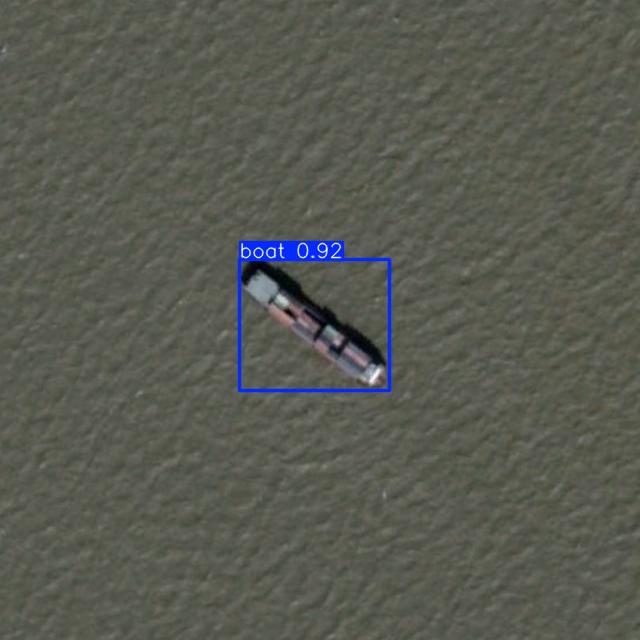

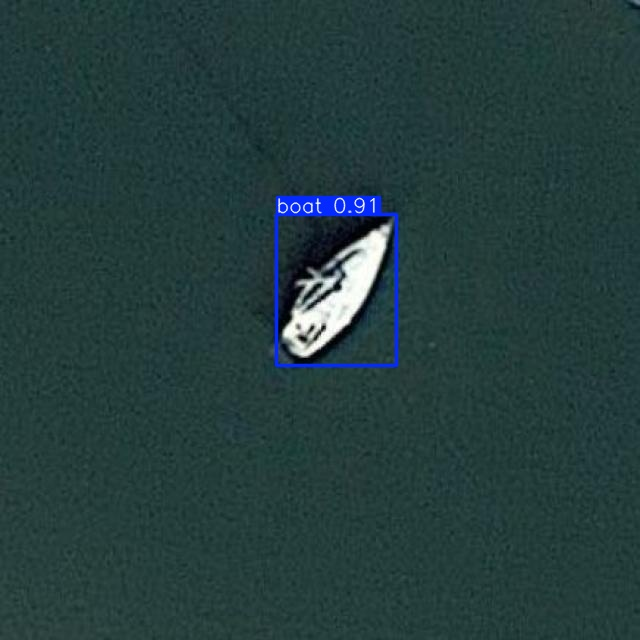

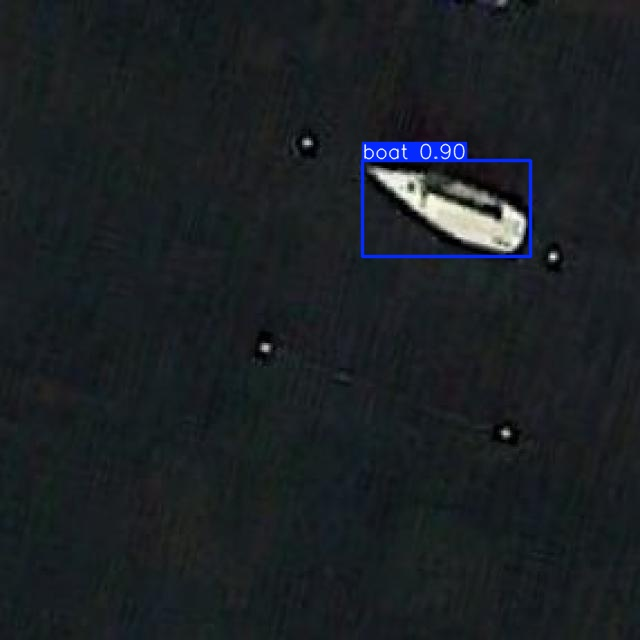

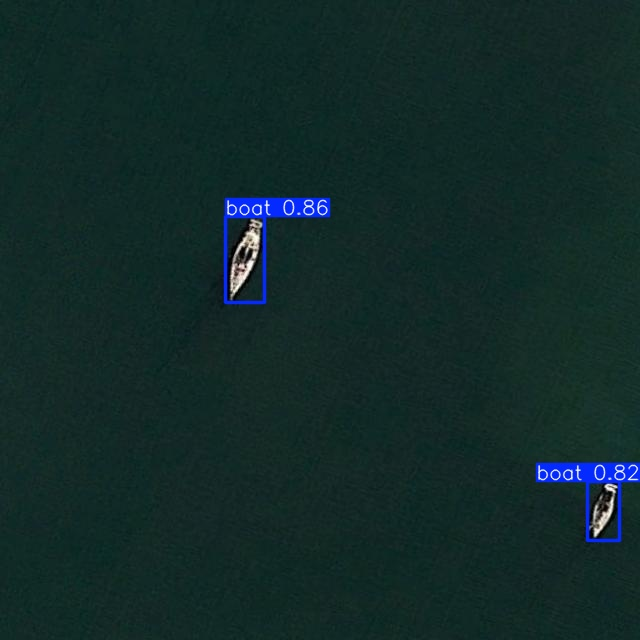

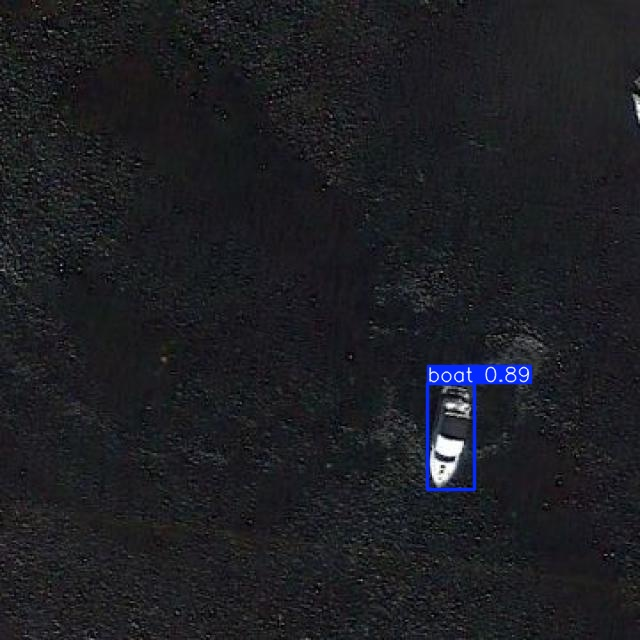

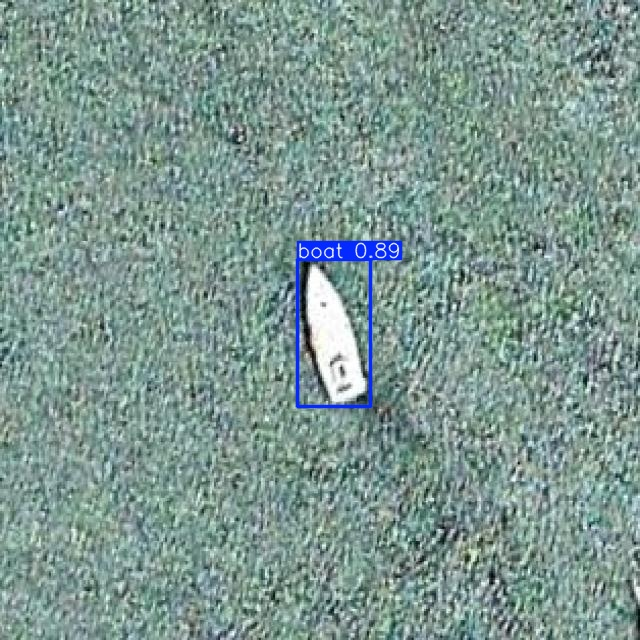

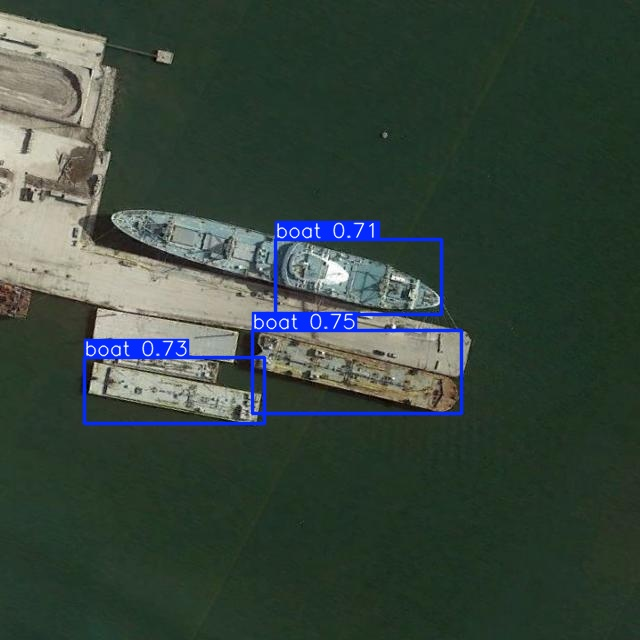

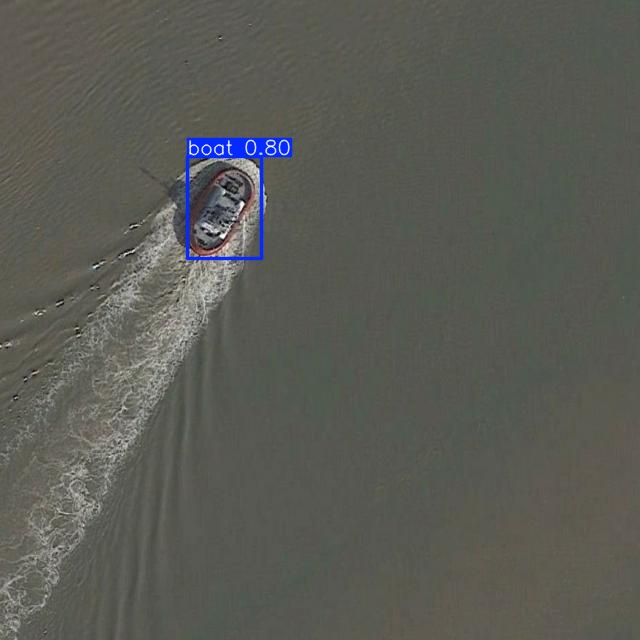

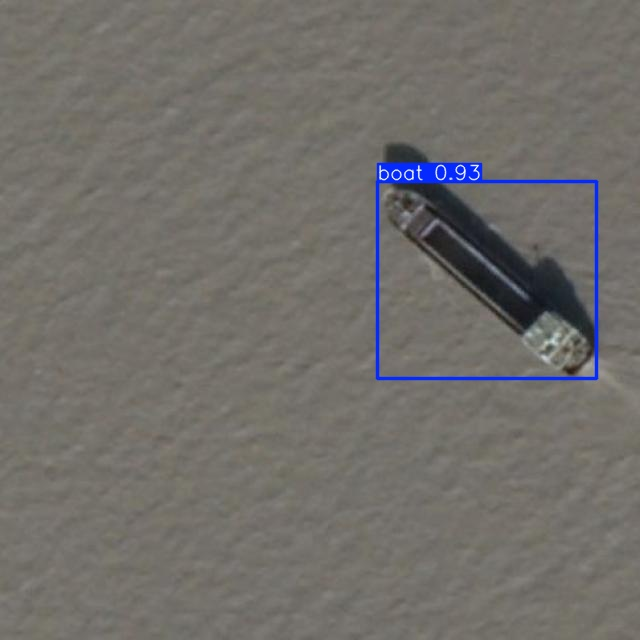

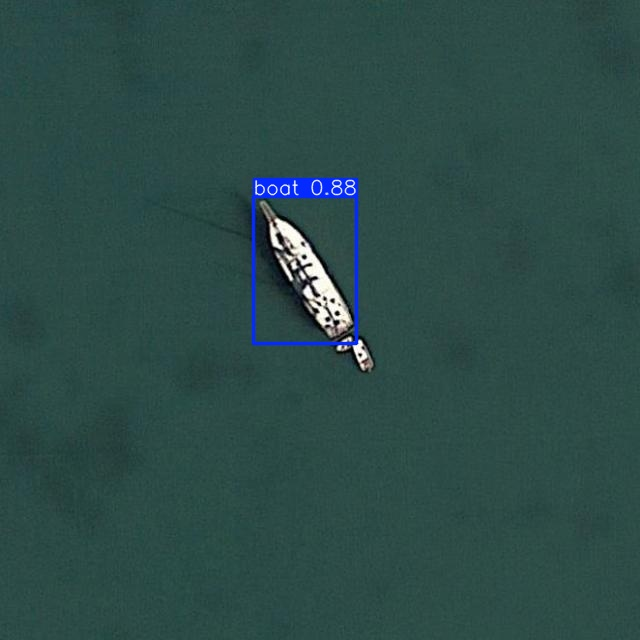

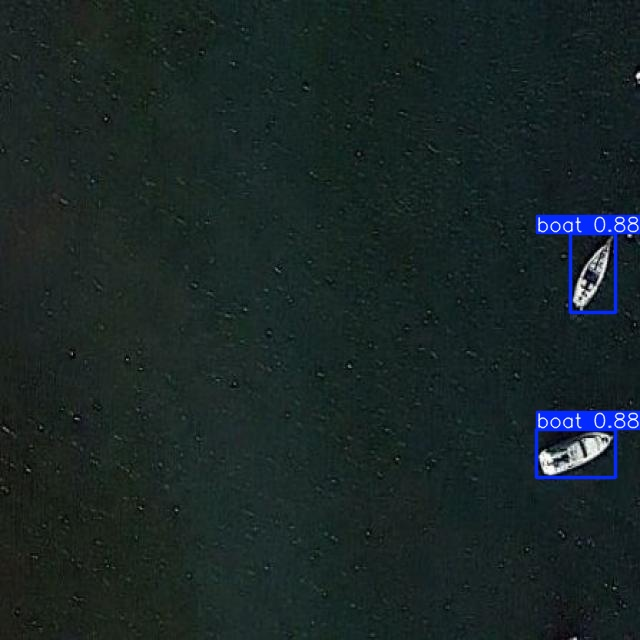

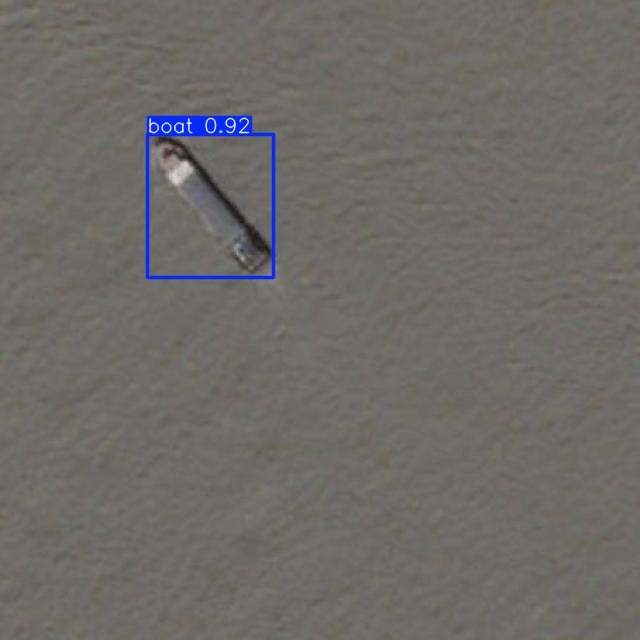

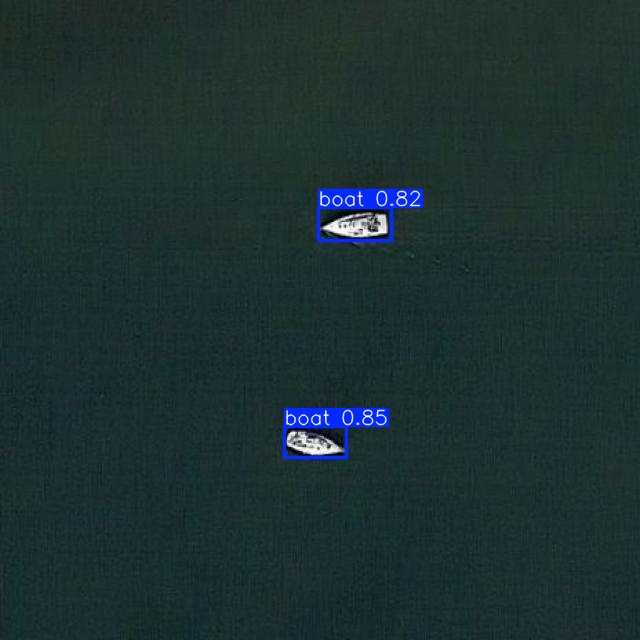

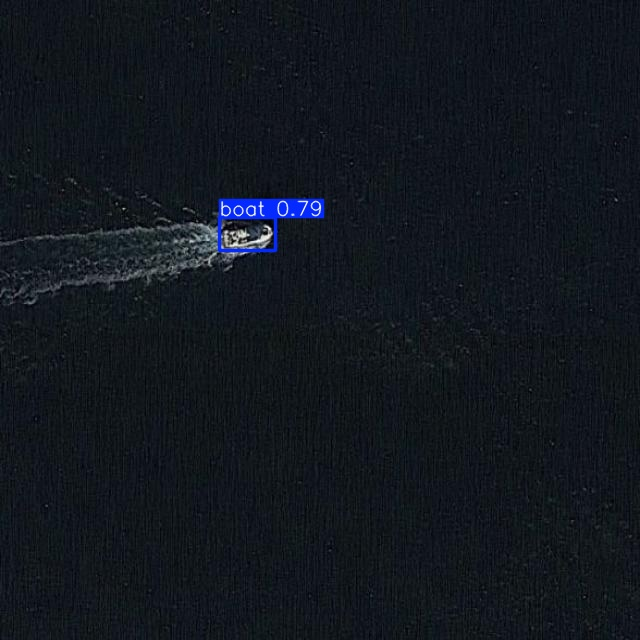

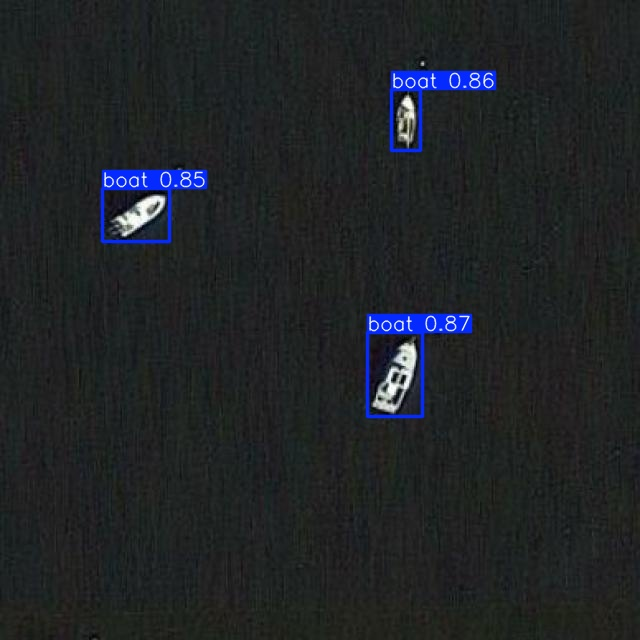

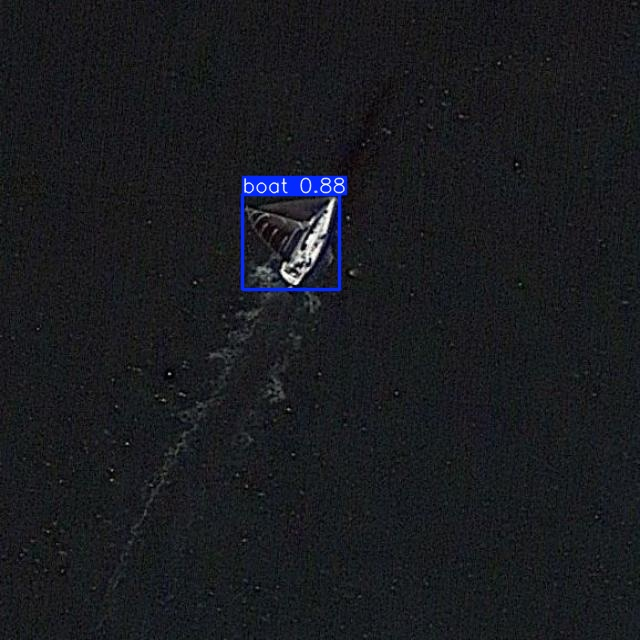

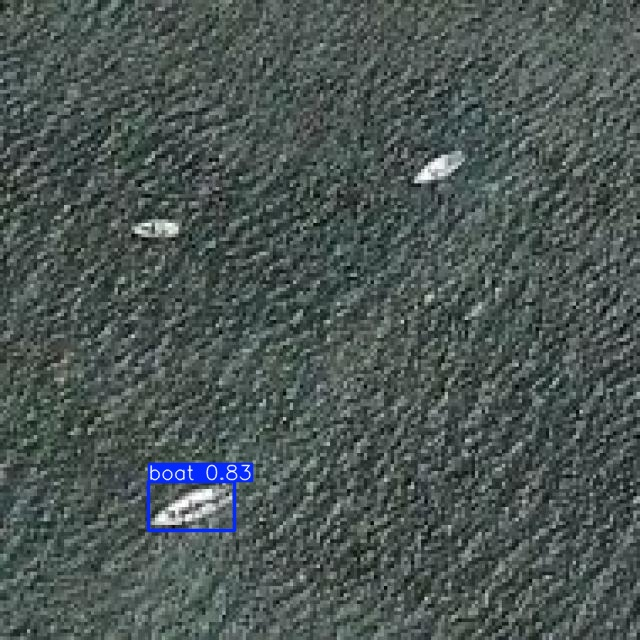

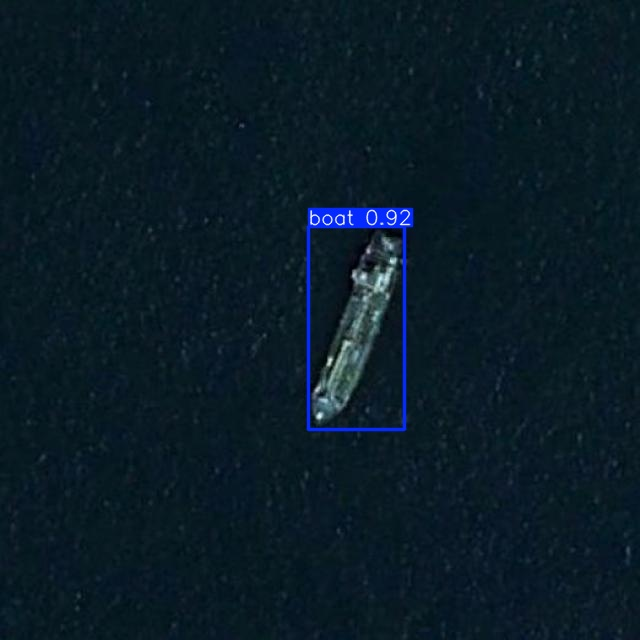

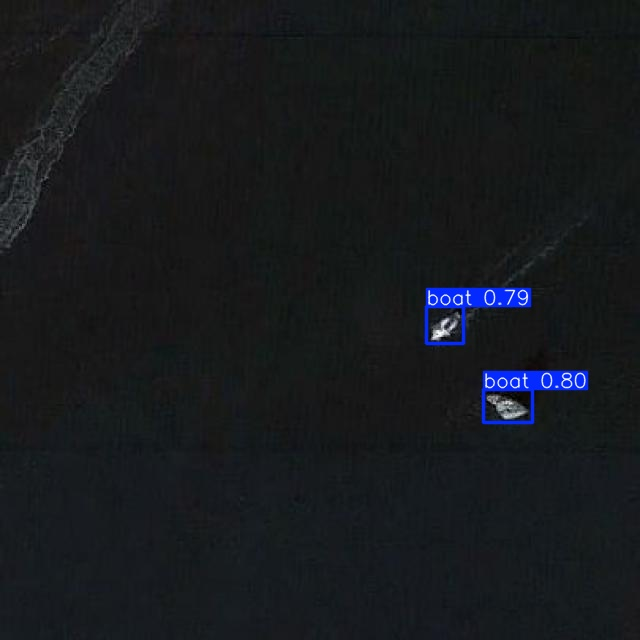

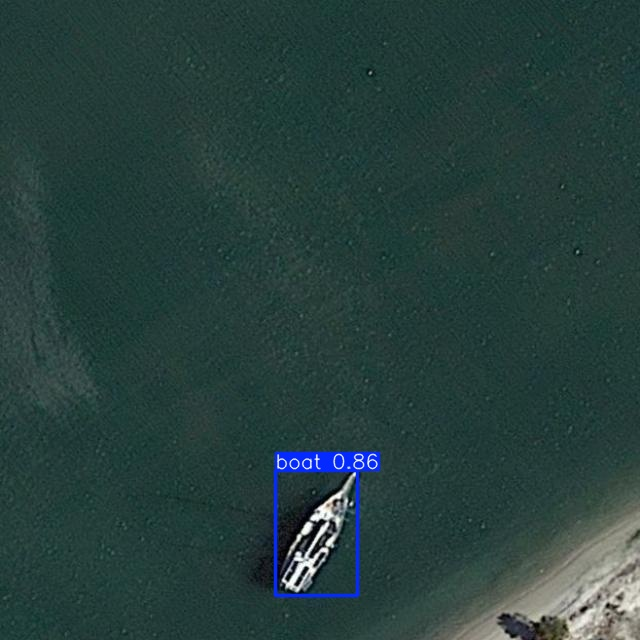

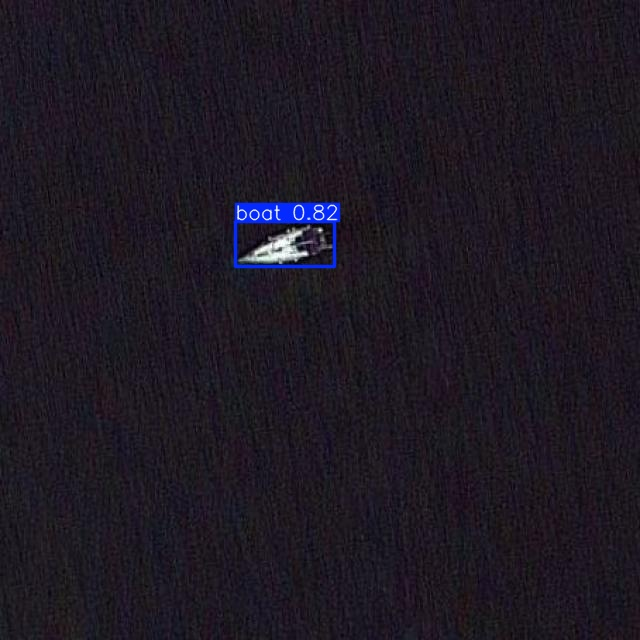

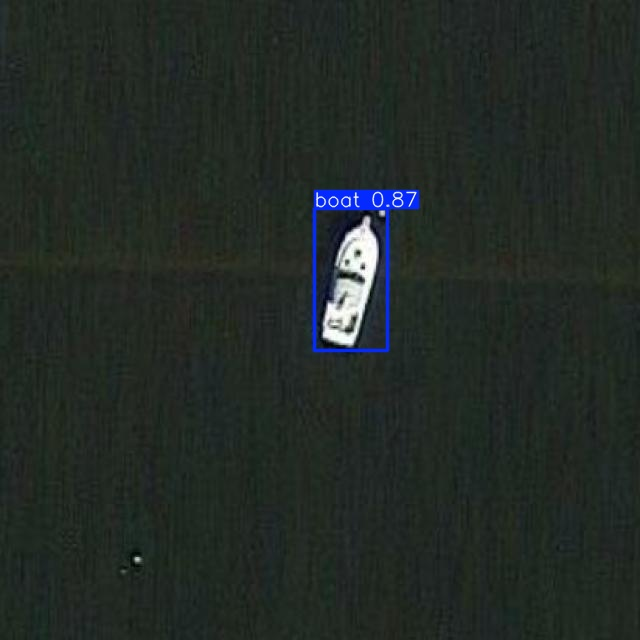

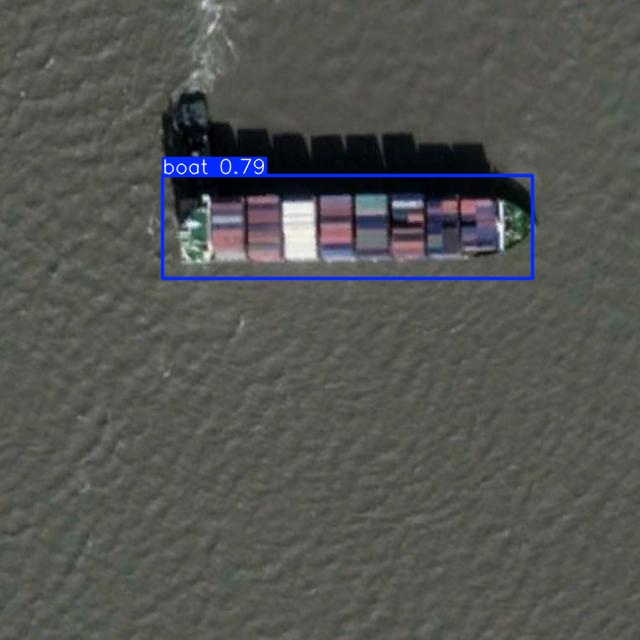

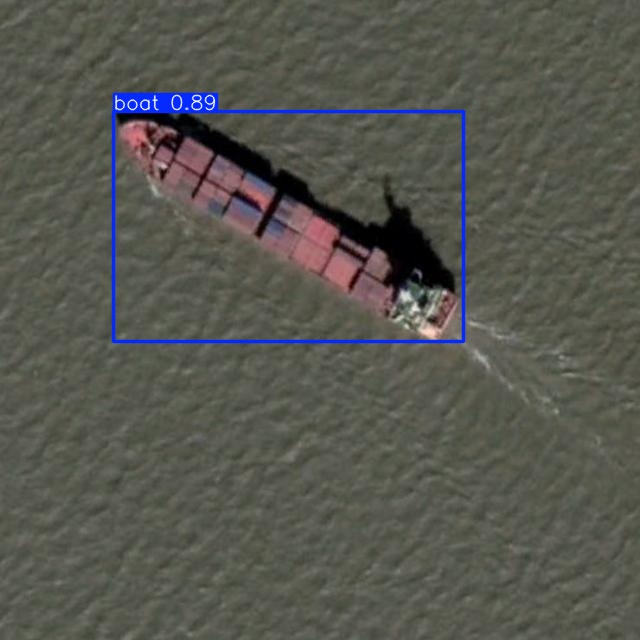

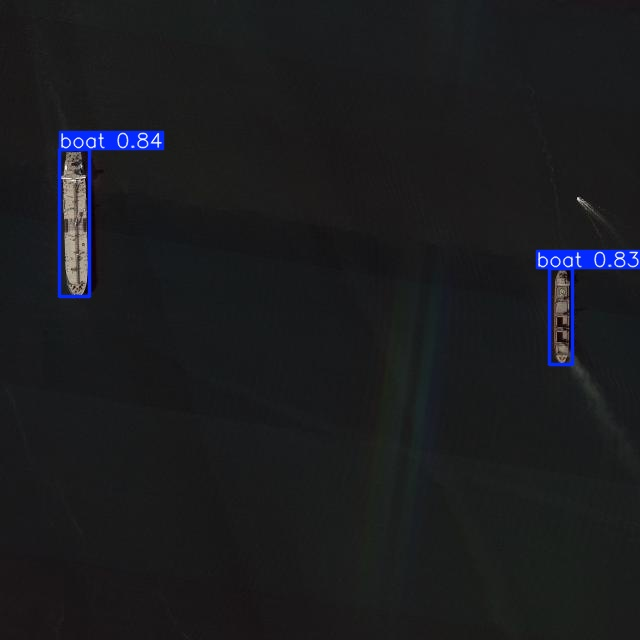

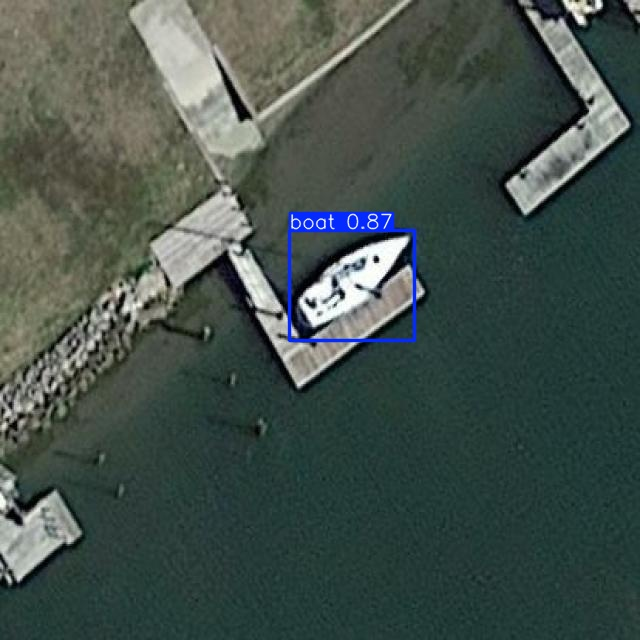

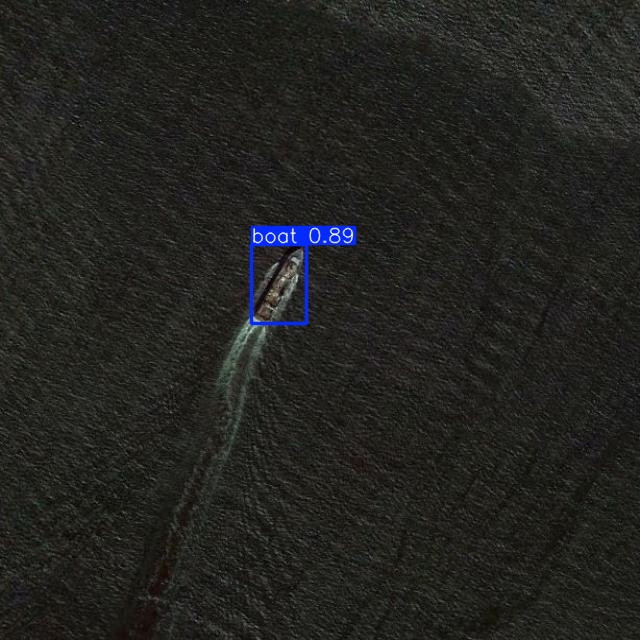

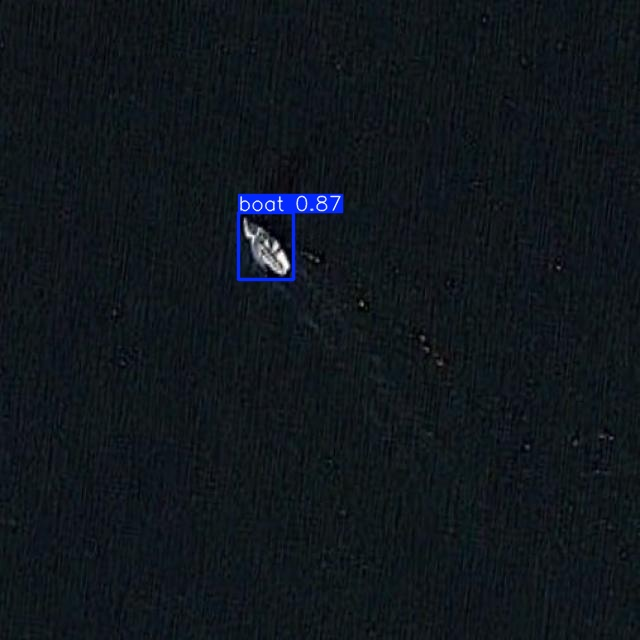

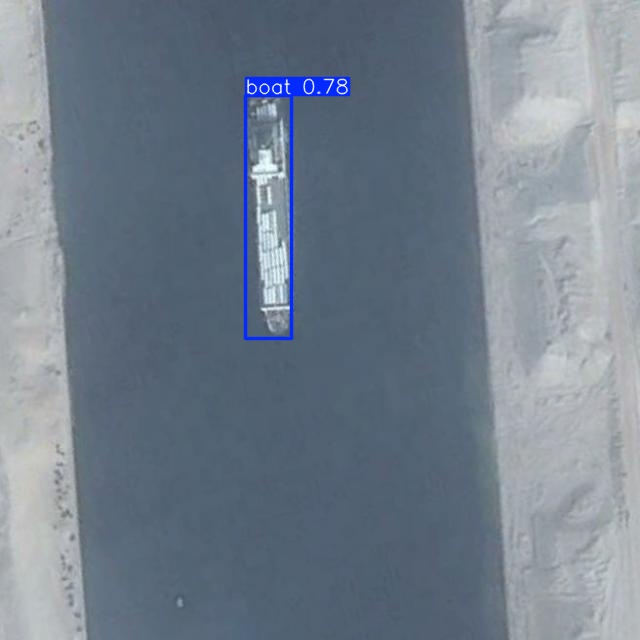

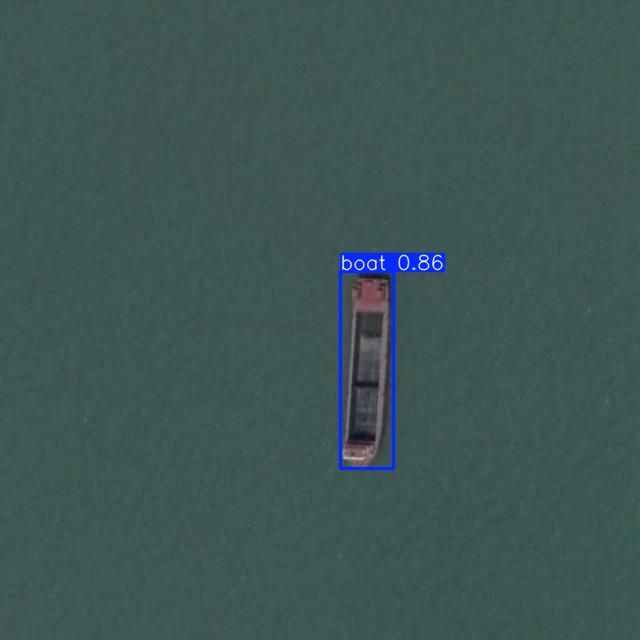

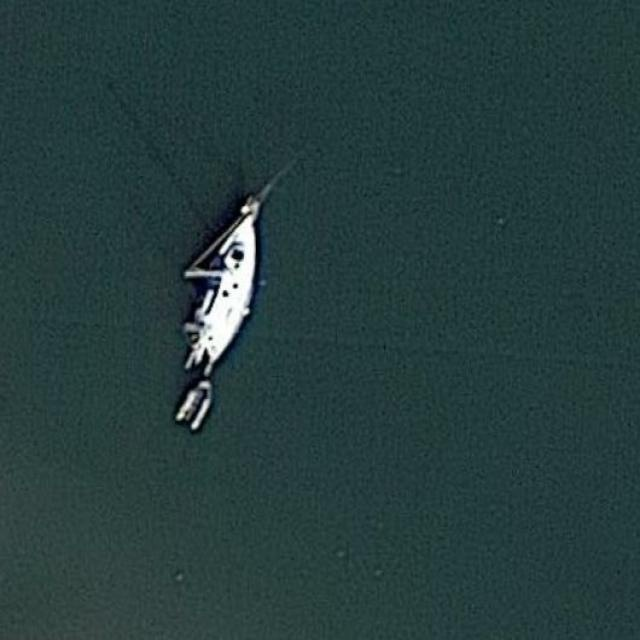

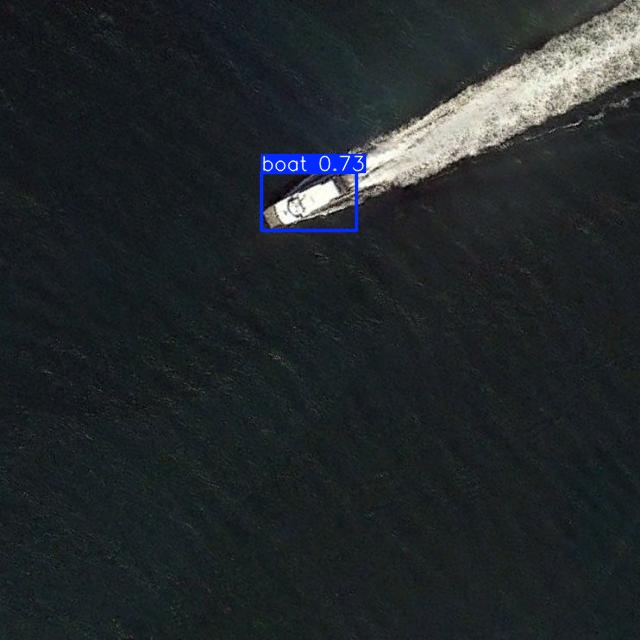

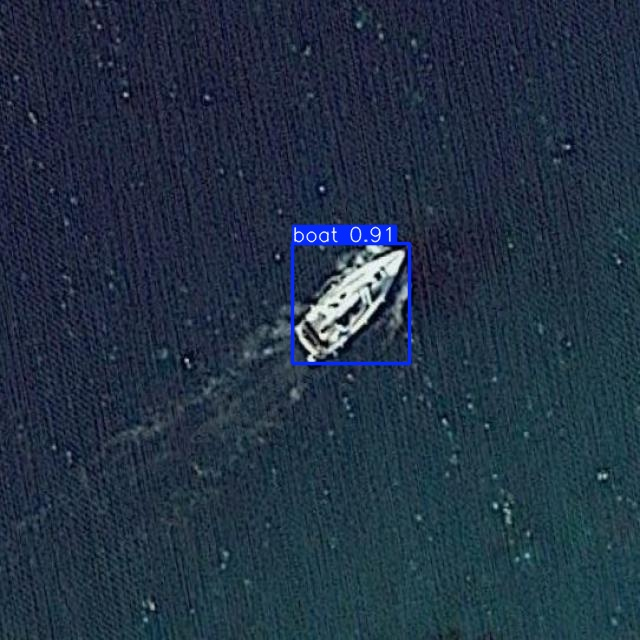

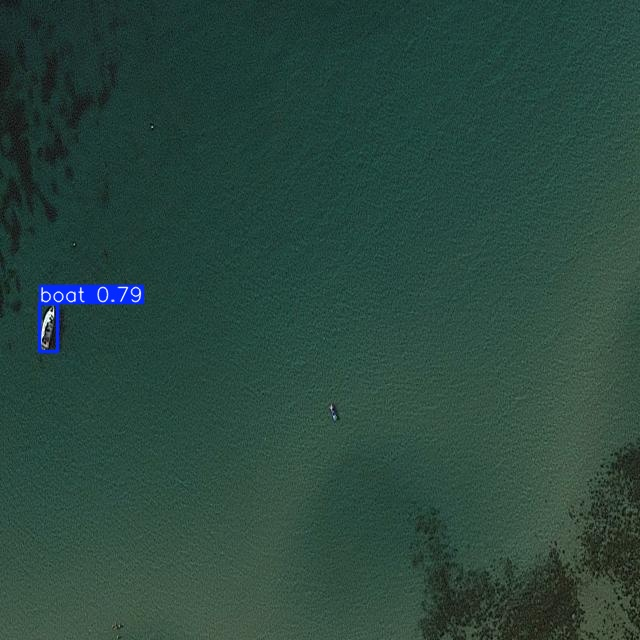

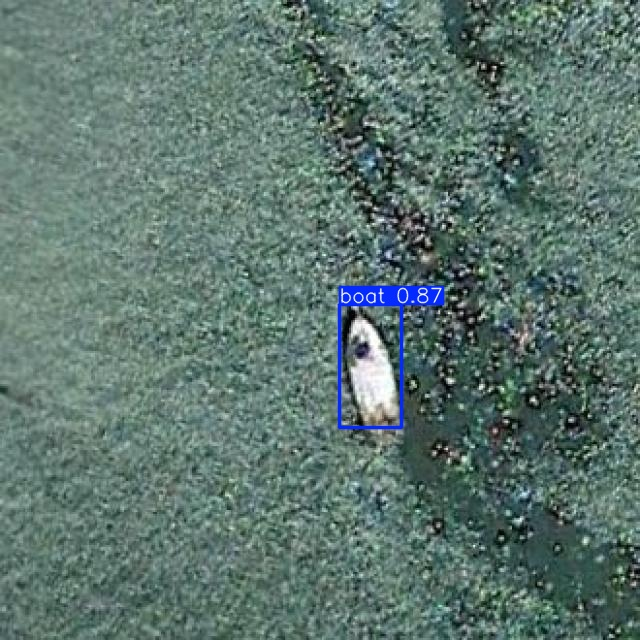

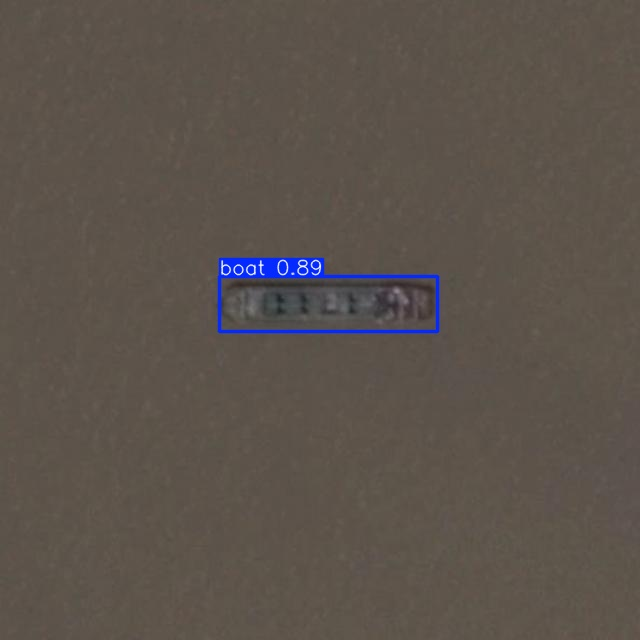

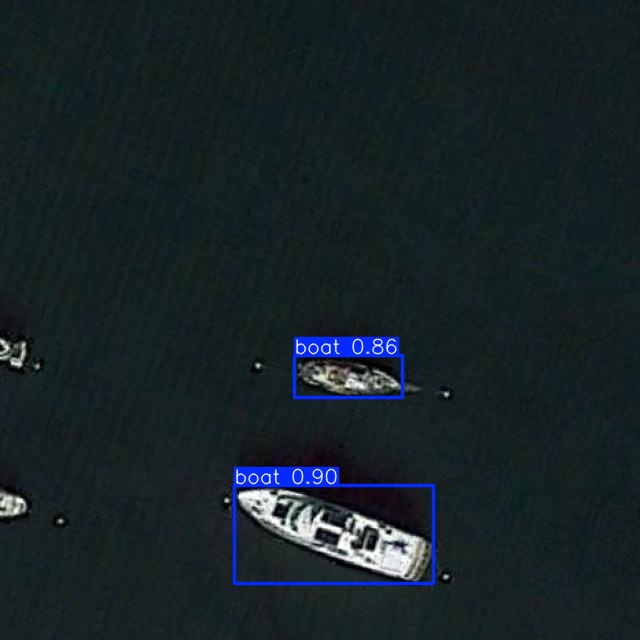

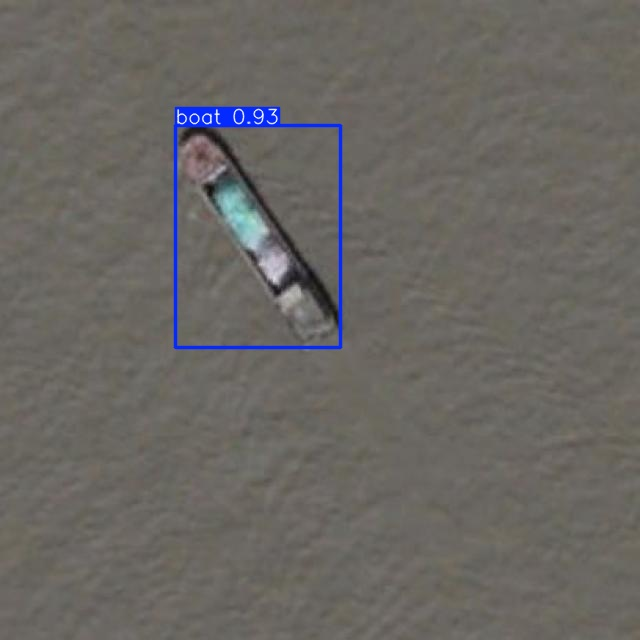

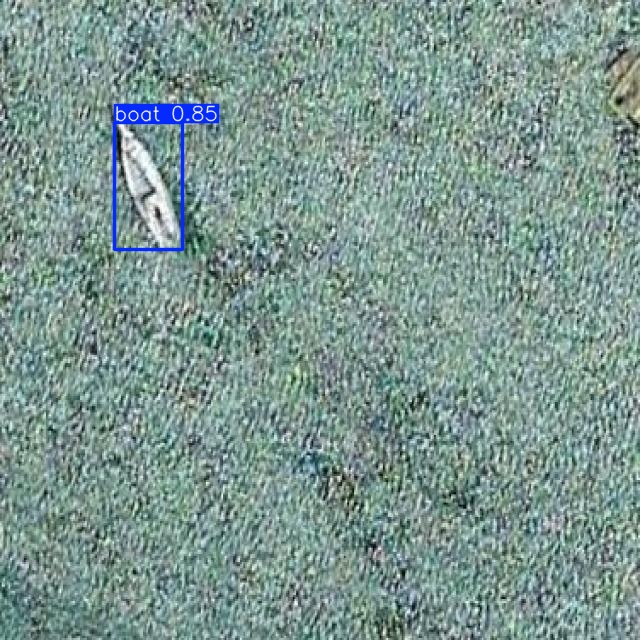

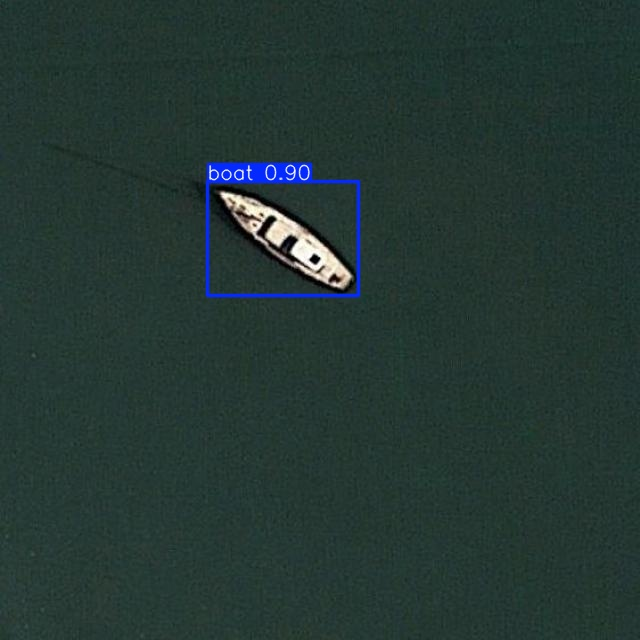

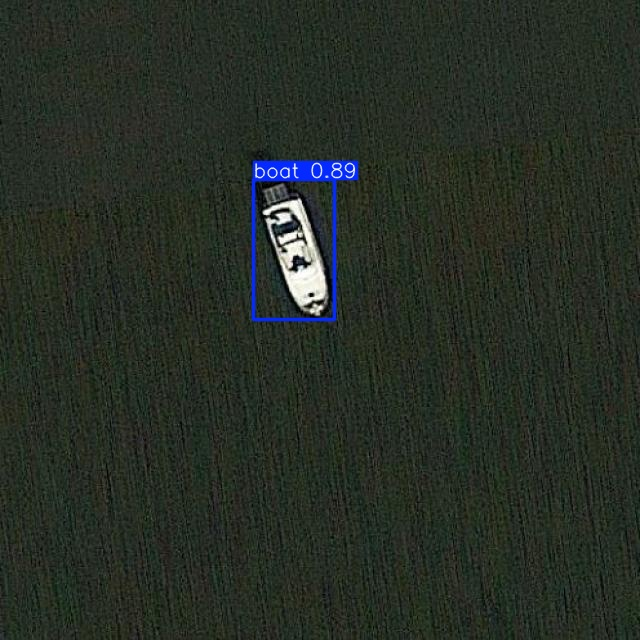

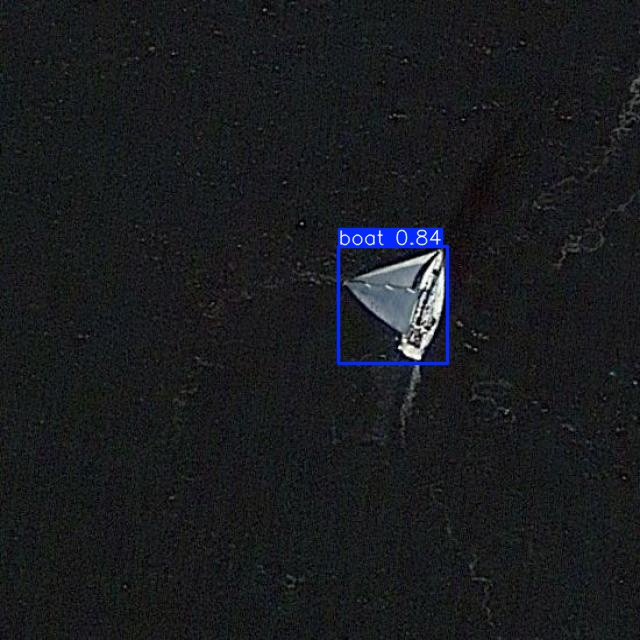

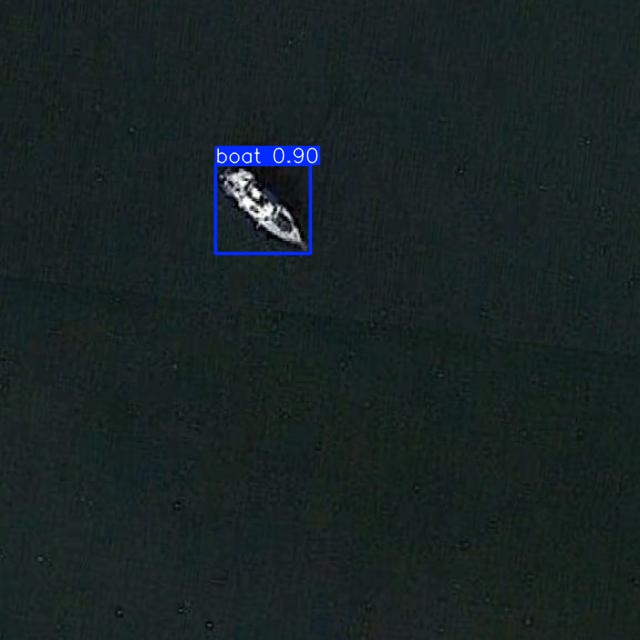

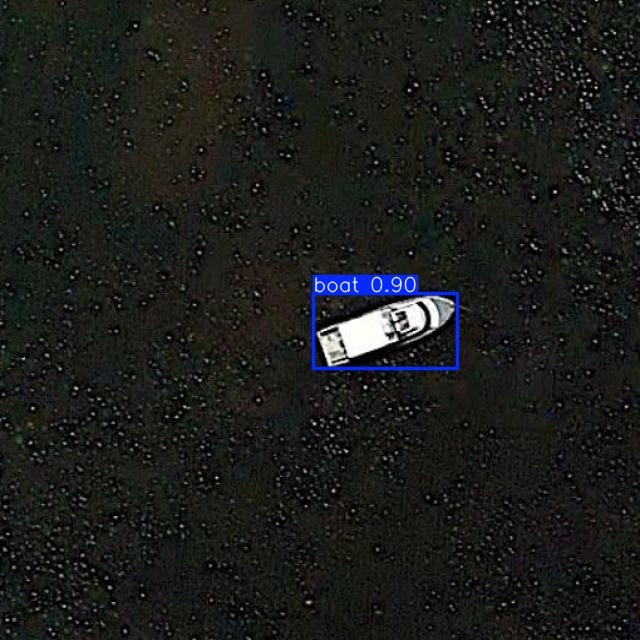

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")